**Importing Necessary Libraries**

In [772]:
import os
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

**Loading the dataset**

In [773]:
subjectwise_data_folder = 'subjectwise_data'

**Function to load the data of an individual candidate**

In [774]:
def load_candidate_data(candidate_id):
    candidate_folder = os.path.join(subjectwise_data_folder, str(candidate_id))

    #loading emotion data
    emotion_df = pd.read_csv(os.path.join(candidate_folder, "emotion.csv"))

    #loading gaze data
    gaze_df = pd.read_csv(os.path.join(candidate_folder, "gaze.csv"))

    #loading metadata
    metadata_df = pd.read_csv(os.path.join(candidate_folder, "metadata.csv"))

    #loading transcript data
    transcript_score_df = pd.read_csv(os.path.join(candidate_folder, f"{candidate_id}.csv"))

    #loading transcript
    with open(os.path.join(candidate_folder, f"{candidate_id}.txt"), 'r') as file:
        transcript_text = file.read()
    
    return emotion_df, gaze_df, metadata_df, transcript_score_df, transcript_text

**Loading Data of Candidate 1**

In [775]:
#loading data for candidate 1
candidate_id = 10
emotion_data, gaze_data, metadata_data, transcript_scores, transcript_text = load_candidate_data(candidate_id)

print(emotion_data.head())  #inspecting the first few rows of emotion data
print(gaze_data.head())     #inspecting the first few rows of gaze data
print(metadata_data.head()) #inspecting the first few rows of metadata
print(transcript_scores.head())  #inspecting transcript scores
print(transcript_text[:500])  #displaying first 500 characters of the transcript

                               movie_id  image_seq      angry       disgust  \
0  83c20b83-7881-499d-a40d-cc06b65869f8          0   0.393006  2.191800e-07   
1  83c20b83-7881-499d-a40d-cc06b65869f8          1   0.099217  2.922750e-02   
2  83c20b83-7881-499d-a40d-cc06b65869f8          2   0.430551  3.103540e-04   
3  83c20b83-7881-499d-a40d-cc06b65869f8          3  11.622700  1.721370e-04   
4  83c20b83-7881-499d-a40d-cc06b65869f8          4   1.428140  2.151490e-03   

        fear      happy        sad      surprise    neutral dominant_emotion  
0   0.622241   0.000231  98.333400  4.278190e-07   0.651150              sad  
1   1.279490  97.453700   0.837835  2.791860e-03   0.297701            happy  
2  43.123700   0.283289   0.202208  5.554470e+01   0.415176         surprise  
3   8.821420   0.007699   0.813382  6.848630e+00  71.886000          neutral  
4  82.596400   3.834700   0.931493  1.101040e+01   0.196761             fear  
                               movie_id  image_seq 

**Function to Check for Missing Values**

In [776]:
def check_missing_values(df, name):
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

**Checking for Missing Values**

In [777]:
#checking for missing data
check_missing_values(emotion_data, "Emotion Data")
check_missing_values(gaze_data, "Gaze Data")
check_missing_values(metadata_data, "Metadata Data")
check_missing_values(transcript_scores, "Transcript Scores")

Missing values in Emotion Data:
movie_id            0
image_seq           0
angry               0
disgust             0
fear                0
happy               0
sad                 0
surprise            0
neutral             0
dominant_emotion    0
dtype: int64


Missing values in Gaze Data:
movie_id      0
image_seq     0
gaze          0
blink         0
eye_offset    0
dtype: int64


Missing values in Metadata Data:
movie_id          0
image_seq         0
participant_id    0
elapsed_time      0
upload_time       0
distance          0
dtype: int64


Missing values in Transcript Scores:
id                   0
seek                 0
start                0
end                  0
text                 0
tokens               0
temperature          0
avg_logprob          0
compression_ratio    0
no_speech_prob       0
positive             0
negative             0
neutral              0
confident            0
hesitant             0
concise              0
enthusiastic         0
speech_speed 

**Ensuring correct data types**

In [778]:
#checking data types
print(emotion_data.dtypes)
print(gaze_data.dtypes)
print(metadata_data.dtypes)
print(transcript_scores.dtypes)

movie_id             object
image_seq             int64
angry               float64
disgust             float64
fear                float64
happy               float64
sad                 float64
surprise            float64
neutral             float64
dominant_emotion     object
dtype: object
movie_id       object
image_seq       int64
gaze            int64
blink           int64
eye_offset    float64
dtype: object
movie_id           object
image_seq           int64
participant_id     object
elapsed_time      float64
upload_time        object
distance          float64
dtype: object
id                     int64
seek                   int64
start                float64
end                  float64
text                  object
tokens                object
temperature          float64
avg_logprob          float64
compression_ratio    float64
no_speech_prob       float64
positive             float64
negative             float64
neutral              float64
confident            float64
hesita

**Converting into correct data types**

In [779]:
#converting category columns to category data types
emotion_data['movie_id'] = emotion_data['movie_id'].astype('category')
emotion_data['dominant_emotion'] = emotion_data['dominant_emotion'].astype('category')
gaze_data['movie_id'] = gaze_data['movie_id'].astype('category')
metadata_data['movie_id'] = metadata_data['movie_id'].astype('category')
metadata_data['participant_id'] = metadata_data['participant_id'].astype('category')
metadata_data['upload_time'] = pd.to_datetime(metadata_data['upload_time'])

**Choosing a feature scaling technique**

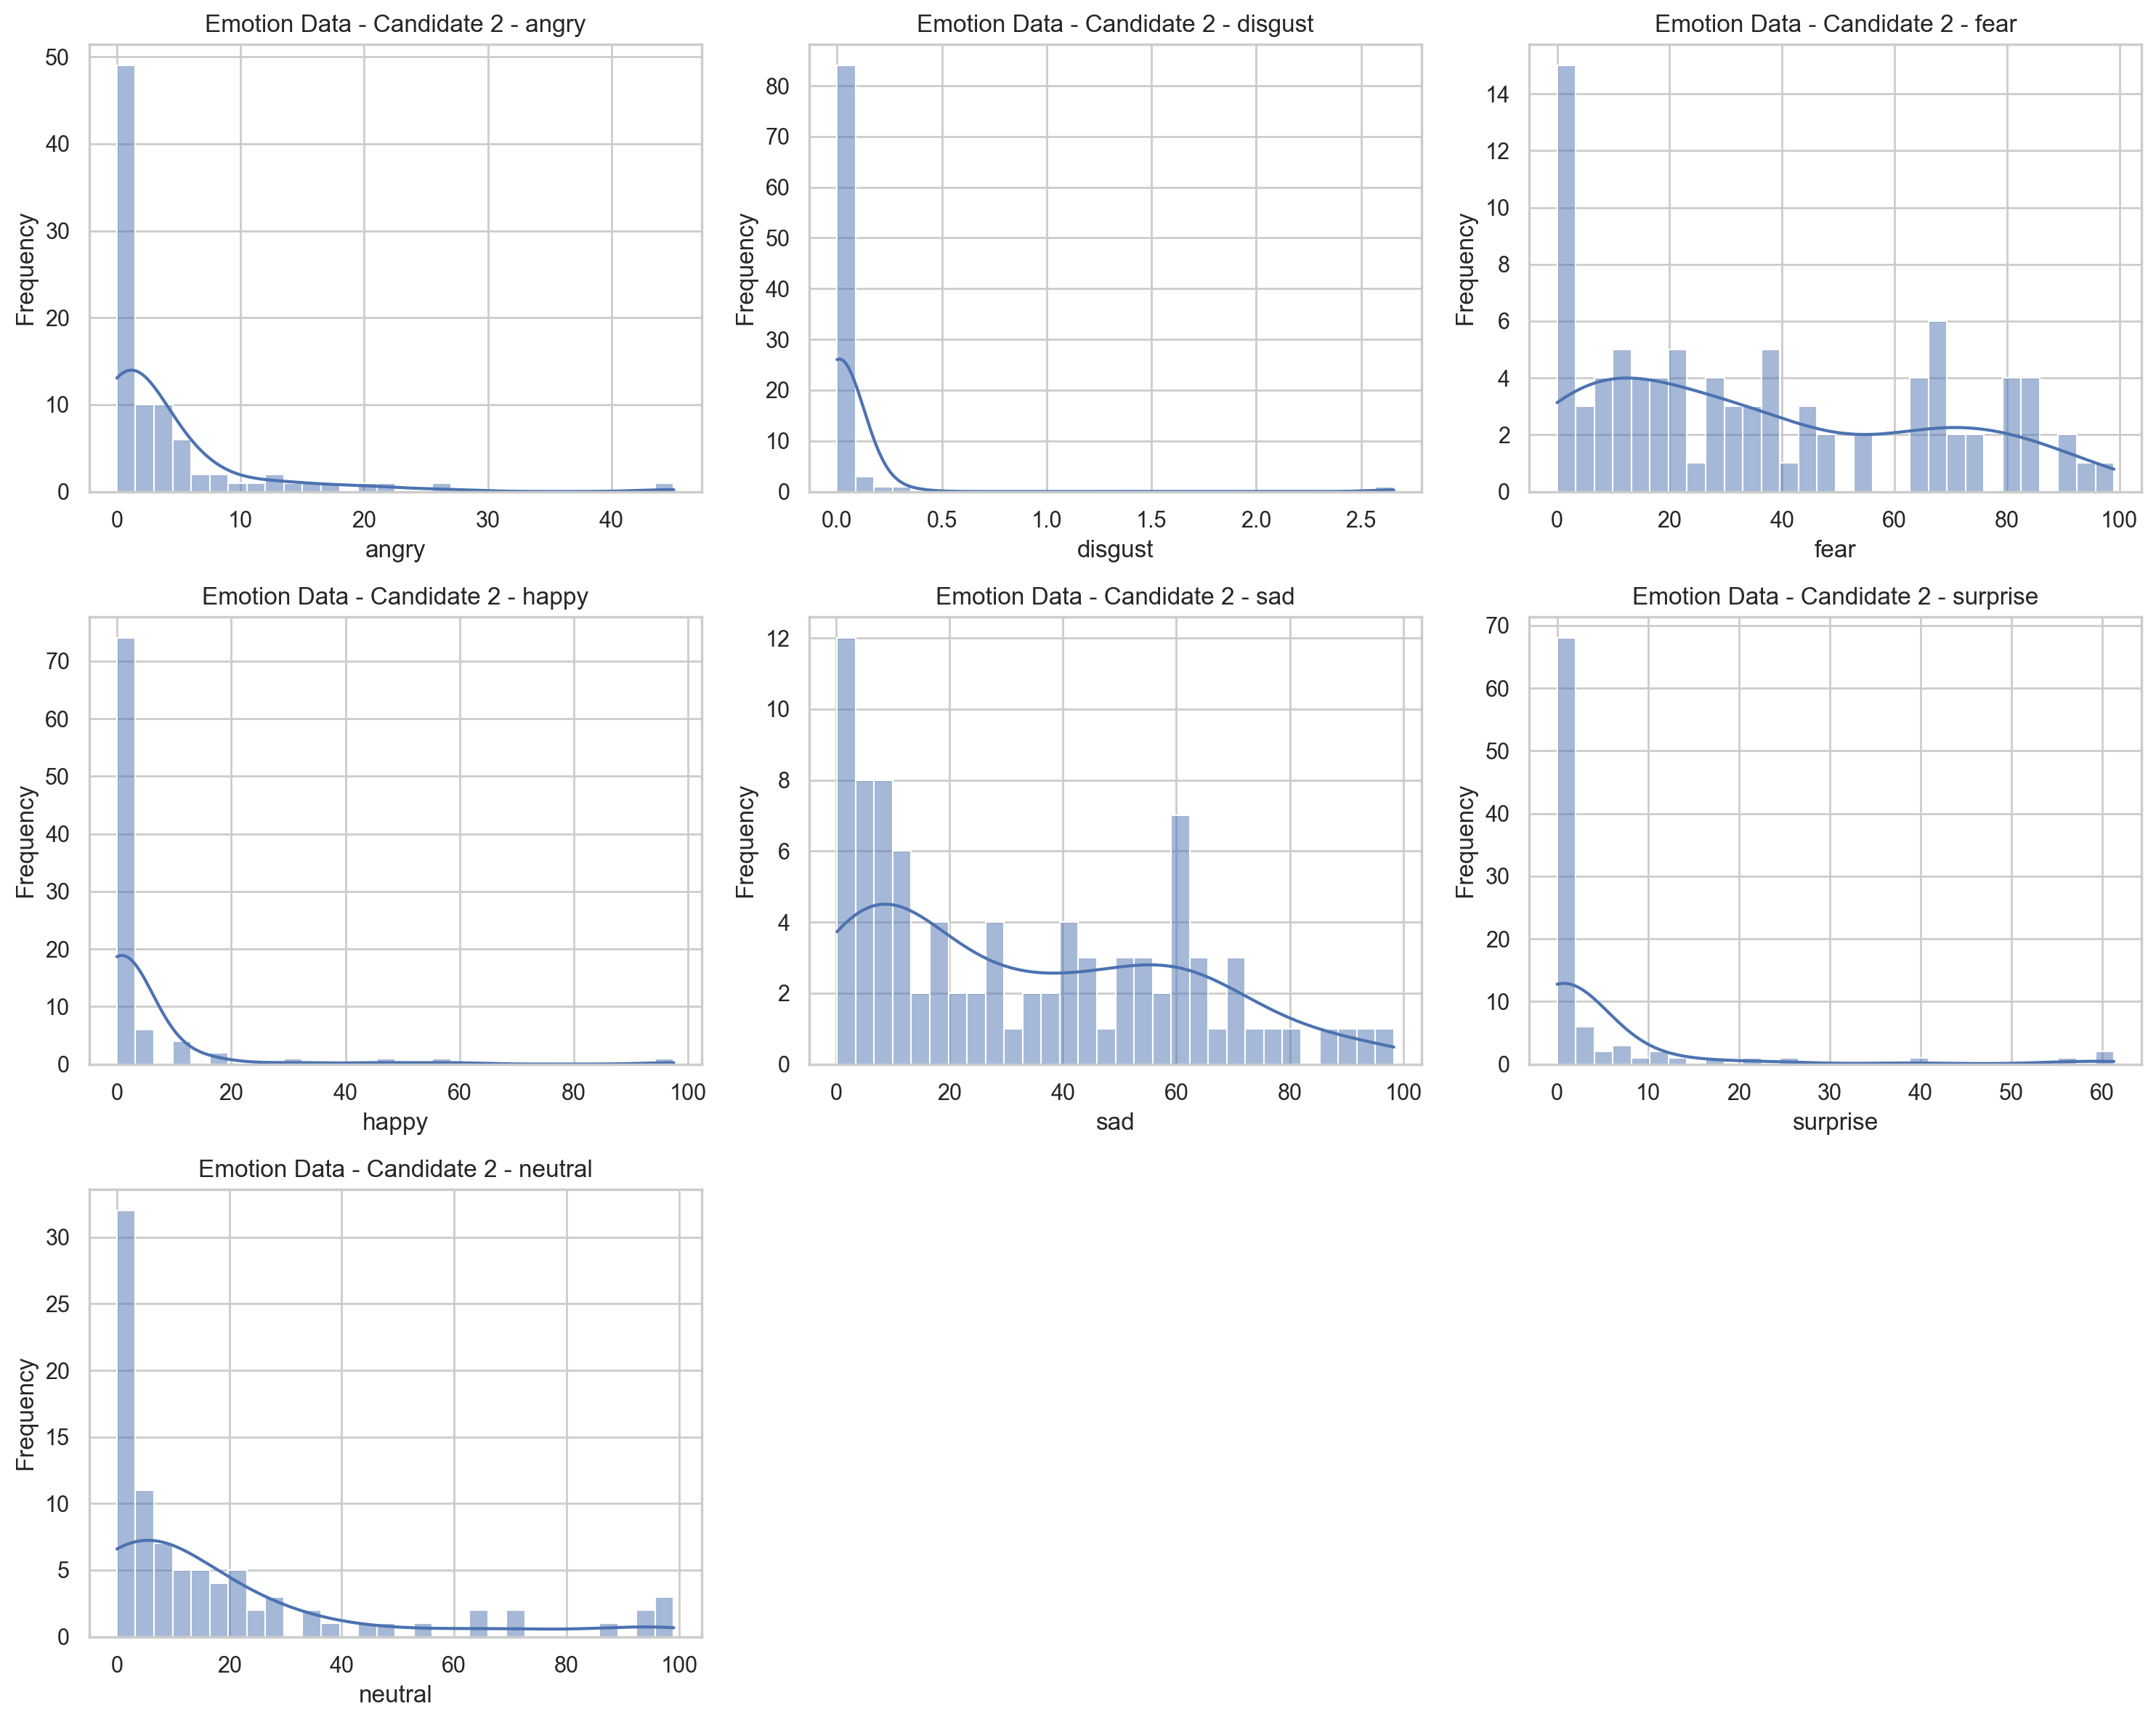

In [780]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_emotion_histograms(df, title, exclude_columns=None, save_path=None):
    if exclude_columns is None:
        exclude_columns = []

    #excluding columns that do not give us important insights
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    numerical_features = [col for col in numerical_features if col not in exclude_columns]
    
    if not numerical_features:
        print(f"No numerical features to plot in {title}. Skipping...")
        return
    
    num_features = len(numerical_features)
    num_cols = 3
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)
    
    plt.figure(figsize=(num_cols * 5, num_rows * 4))
    
    for i, feature in enumerate(numerical_features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'{title} - {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

#loading data for candidate 1 
candidate_id = 10
emotion_data, _, _, _, _ = load_candidate_data(candidate_id)

#plotting histograms for emotion data, excluding 'movie_id' and 'image_seq'
plot_emotion_histograms(emotion_data, 'Emotion Data - Candidate 2', exclude_columns=['movie_id', 'image_seq'])


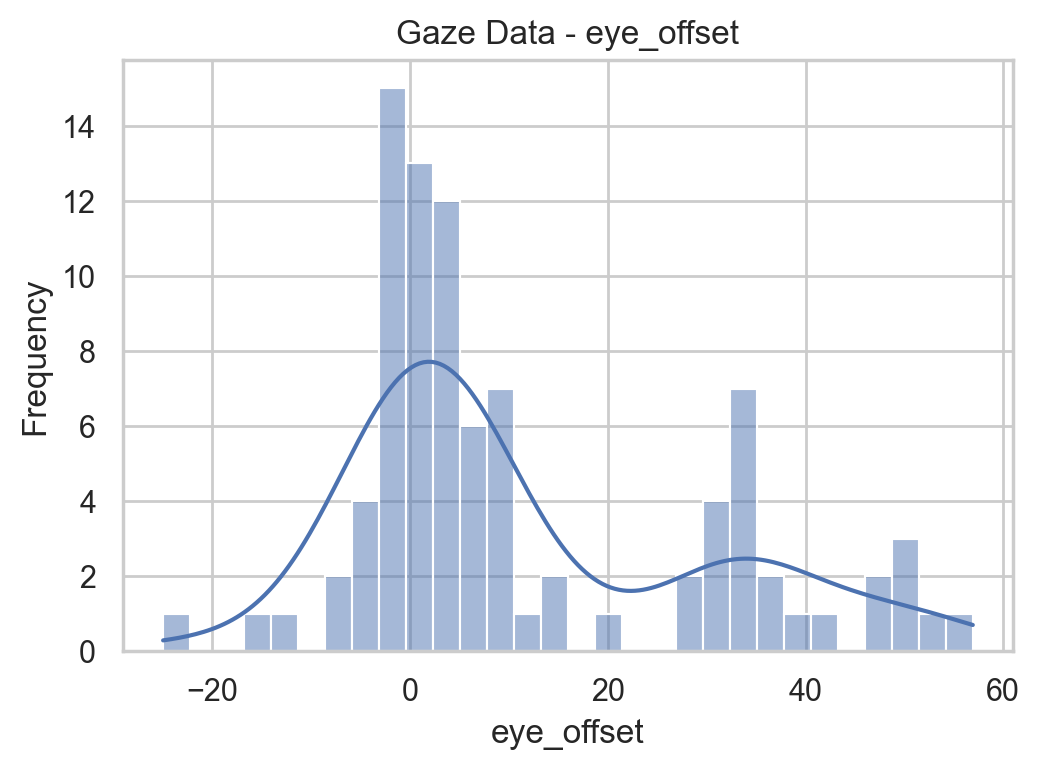

In [781]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_gaze_data_histograms(df, save_path=None):
    # Features to plot
    features = ['eye_offset']
    
    # Check if there are any features to plot
    if not features:
        print("No features to plot in Gaze Data. Skipping...")
        return
    
    num_features = len(features)
    num_cols = 2
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)
    
    plt.figure(figsize=(num_cols * 5, num_rows * 4))
    
    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Gaze Data - {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Load gaze data for candidate 1 (or any other candidate)
candidate_id = 10
_, gaze_data, _, _, _ = load_candidate_data(candidate_id)

# Plot histograms for gaze data
plot_gaze_data_histograms(gaze_data)


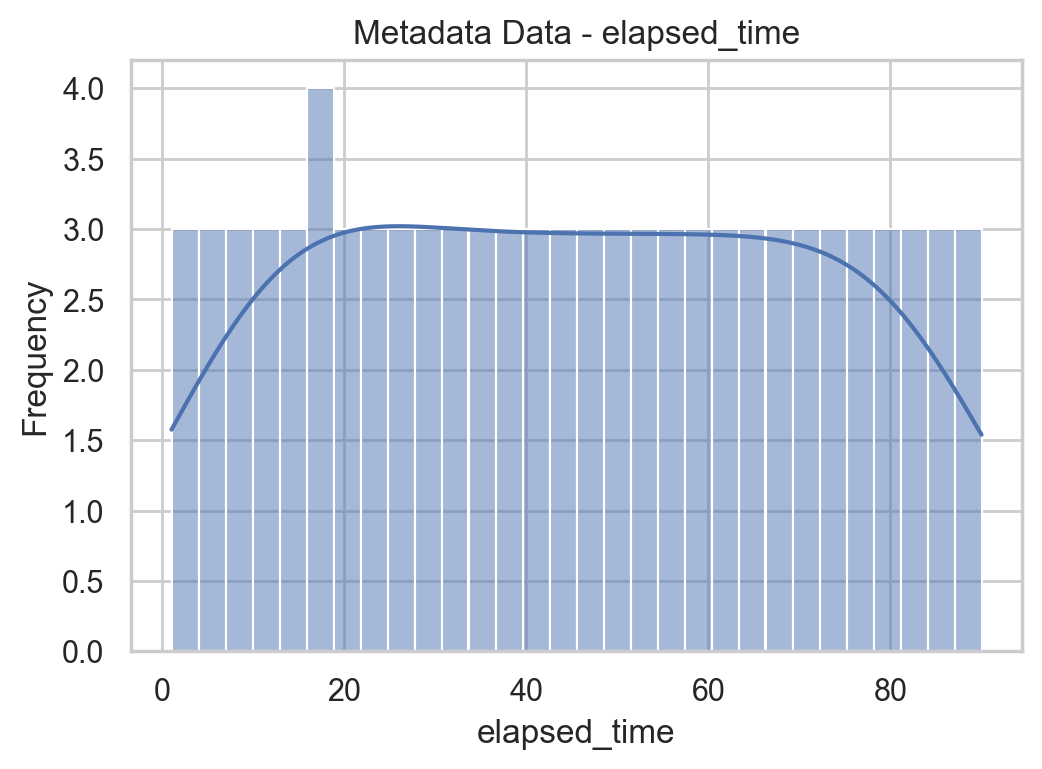

In [782]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metadata_histograms(metadata_df):
    # Features to plot
    features_to_plot = ['elapsed_time']

    # Plot histograms for selected features
    num_features = len(features_to_plot)
    num_cols = 2
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)
    
    plt.figure(figsize=(num_cols * 5, num_rows * 4))
    
    for i, feature in enumerate(features_to_plot):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(metadata_df[feature], kde=True, bins=30)
        plt.title(f'Metadata Data - {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_metadata_histograms(metadata_data)


**Performing Normalization on our data**

In [783]:
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(df, features_to_exclude=[]):
    # Select numeric features excluding specified ones
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    features_to_normalize = [f for f in numerical_features if f not in features_to_exclude]
    
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()
    
    # Create a copy of the dataframe to avoid modifying the original
    df_normalized = df.copy()
    
    # Apply MinMaxScaler to the selected features
    if features_to_normalize:
        df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
    
    return df_normalized

# Example usage
# Normalize emotion_data, excluding 'movie_id' and 'image_seq'
normalized_emotion_data = normalize_dataframe(emotion_data, features_to_exclude=['movie_id', 'image_seq','dominant_emotion'])

# Normalize gaze_data, excluding 'movie_id' and 'image_seq'
normalized_gaze_data = normalize_dataframe(gaze_data, features_to_exclude=['movie_id', 'image_seq','blink'])

# Normalize metadata_data, excluding 'movie_id', 'participant_id', 'upload_time'
normalized_metadata_data = normalize_dataframe(metadata_data, features_to_exclude=['movie_id', 'participant_id', 'upload_time','image_seq'])

# Normalize transcript_scores, excluding 'id' if it's present
normalized_transcript_scores = normalize_dataframe(transcript_scores, features_to_exclude=['id','seek','start','end','text','tokens','temperature','avg_logprob'])


**Function to Check for Outliers**

In [784]:
def check_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        print(f"Outliers in {column}:")
        print(df[column].describe())
        print(df[(df[column] < df[column].quantile(0.01)) | (df[column] > df[column].quantile(0.99))])

**Checking Outliers in each data**

In [785]:
check_outliers(normalized_emotion_data)

Outliers in image_seq:
count    90.000000
mean     45.311111
std      26.393157
min       0.000000
25%      23.250000
50%      45.500000
75%      67.750000
max      90.000000
Name: image_seq, dtype: float64
                                movie_id  image_seq     angry       disgust  \
0   83c20b83-7881-499d-a40d-cc06b65869f8          0  0.008681  8.251761e-08   
89  83c20b83-7881-499d-a40d-cc06b65869f8         90  0.000870  1.593318e-08   

        fear     happy       sad  surprise   neutral dominant_emotion  
0   0.006226  0.000002  1.000000  0.000000  0.006486              sad  
89  0.000000  0.000132  0.007053  0.000587  1.000000          neutral  
Outliers in angry:
count    90.000000
mean      0.085592
std       0.151825
min       0.000000
25%       0.005428
50%       0.026554
75%       0.093154
max       1.000000
Name: angry, dtype: float64
                                movie_id  image_seq  angry   disgust  \
60  83c20b83-7881-499d-a40d-cc06b65869f8         61    1.0  0.018955

In [786]:
check_outliers(normalized_gaze_data)

Outliers in image_seq:
count    90.000000
mean     46.311111
std      26.393157
min       1.000000
25%      24.250000
50%      46.500000
75%      68.750000
max      91.000000
Name: image_seq, dtype: float64
                                movie_id  image_seq  gaze  blink  eye_offset
0   83c20b83-7881-499d-a40d-cc06b65869f8          1   1.0      1    0.369784
89  83c20b83-7881-499d-a40d-cc06b65869f8         91   1.0      0    0.112924
Outliers in gaze:
count    90.000000
mean      0.733333
std       0.444694
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: gaze, dtype: float64
Empty DataFrame
Columns: [movie_id, image_seq, gaze, blink, eye_offset]
Index: []
Outliers in blink:
count    90.000000
mean      0.166667
std       0.374766
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: blink, dtype: float64
Empty DataFrame
Columns: [movie_id, image_seq, gaze, blink, eye_offset]
Index: []
Ou

In [787]:
check_outliers(normalized_metadata_data)

Outliers in image_seq:
count    91.00000
mean     45.00000
std      26.41338
min       0.00000
25%      22.50000
50%      45.00000
75%      67.50000
max      90.00000
Name: image_seq, dtype: float64
                                movie_id  image_seq  \
0   83c20b83-7881-499d-a40d-cc06b65869f8          0   
90  83c20b83-7881-499d-a40d-cc06b65869f8         90   

                          participant_id  elapsed_time         upload_time  \
0   70a013ed-120a-41fa-bedd-75a5d15afb76           0.0 2023-09-17 07:49:11   
90  70a013ed-120a-41fa-bedd-75a5d15afb76           1.0 2023-09-17 07:49:11   

    distance  
0        0.0  
90       0.0  
Outliers in elapsed_time:
count    91.000000
mean      0.496481
std       0.293825
min       0.000000
25%       0.241573
50%       0.494382
75%       0.747191
max       1.000000
Name: elapsed_time, dtype: float64
                                movie_id  image_seq  \
0   83c20b83-7881-499d-a40d-cc06b65869f8          0   
90  83c20b83-7881-499d-a40d-cc06

In [788]:
check_outliers(normalized_transcript_scores)

Outliers in id:
count    17.000000
mean      8.000000
std       5.049752
min       0.000000
25%       4.000000
50%       8.000000
75%      12.000000
max      16.000000
Name: id, dtype: float64
    id  seek  start    end                                               text  \
0    0     0   0.00   6.04   My name is Michael Ramos, I am from Patna, Bi...   
16  16  8168  88.84  89.72                                 the best outcomes.   

                                               tokens  temperature  \
0   [50364, 1222, 1315, 307, 49328, 2786, 11, 286,...          0.0   
16               [50722, 264, 1151, 10070, 13, 50766]          0.0   

    avg_logprob  compression_ratio  no_speech_prob  positive  negative  \
0     -0.331398           0.845443        1.000000   0.45042  0.222519   
16    -0.395755           0.000000        0.127246   1.00000  0.000000   

    neutral  confident  hesitant   concise  enthusiastic  speech_speed  
0       1.0   1.000000  1.000000  0.905989      1.000000

**Exploratory Analysis**

Statistical Analysis

In [789]:
import pandas as pd

# Assuming emotion_data is your DataFrame with emotion scores
summary_stats = emotion_data.iloc[:, 1:].describe().T  # Exclude 'image_seq'

# Add a range column
summary_stats['range'] = summary_stats['max'] - summary_stats['min']

# Add row for counts
summary_stats['count'] = emotion_data.count()

# Reorganizing the columns for better readability
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range']]

# Resetting the index to include a column for statistic names
summary_stats.reset_index(inplace=True)
summary_stats.rename(columns={'index': 'Statistic'}, inplace=True)

# Display the summary statistics table
print(summary_stats)

# Optionally, save the summary statistics to a CSV file
summary_stats.to_csv('emotion_data_summary_statistics.csv', index=False)
# Display the table with styling in Jupyter Notebook
styled_table = summary_stats.style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"')
styled_table


   Statistic  count       mean        std           min        25%        50%  \
0  image_seq     90  45.311111  26.393157  0.000000e+00  23.250000  45.500000   
1      angry     90   3.856539   6.837119  2.079890e-03   0.246497   1.197890   
2    disgust     90   0.048451   0.282245  1.680020e-14   0.000010   0.000397   
3       fear     90  36.143804  29.611261  5.674360e-03  12.486100  30.292750   
4      happy     90   4.215283  13.262473  1.959540e-09   0.008163   0.326837   
5        sad     90  32.656818  27.452548  1.505800e-01   7.890707  26.850100   
6   surprise     90   4.330881  11.801720  4.278190e-07   0.010089   0.130428   
7    neutral     90  18.748220  26.503800  8.691460e-03   1.391075   7.152030   

         75%       max      range  
0  67.750000  90.00000  90.000000  
1   4.197088  45.03490  45.032820  
2   0.013415   2.65616   2.656160  
3  65.440375  99.03130  99.025626  
4   1.797740  97.45370  97.453700  
5  56.829700  98.33340  98.182820  
6   1.926030  61.2

**Visual Analysis**

**Tracking Emotional Changes Across Video Frames**

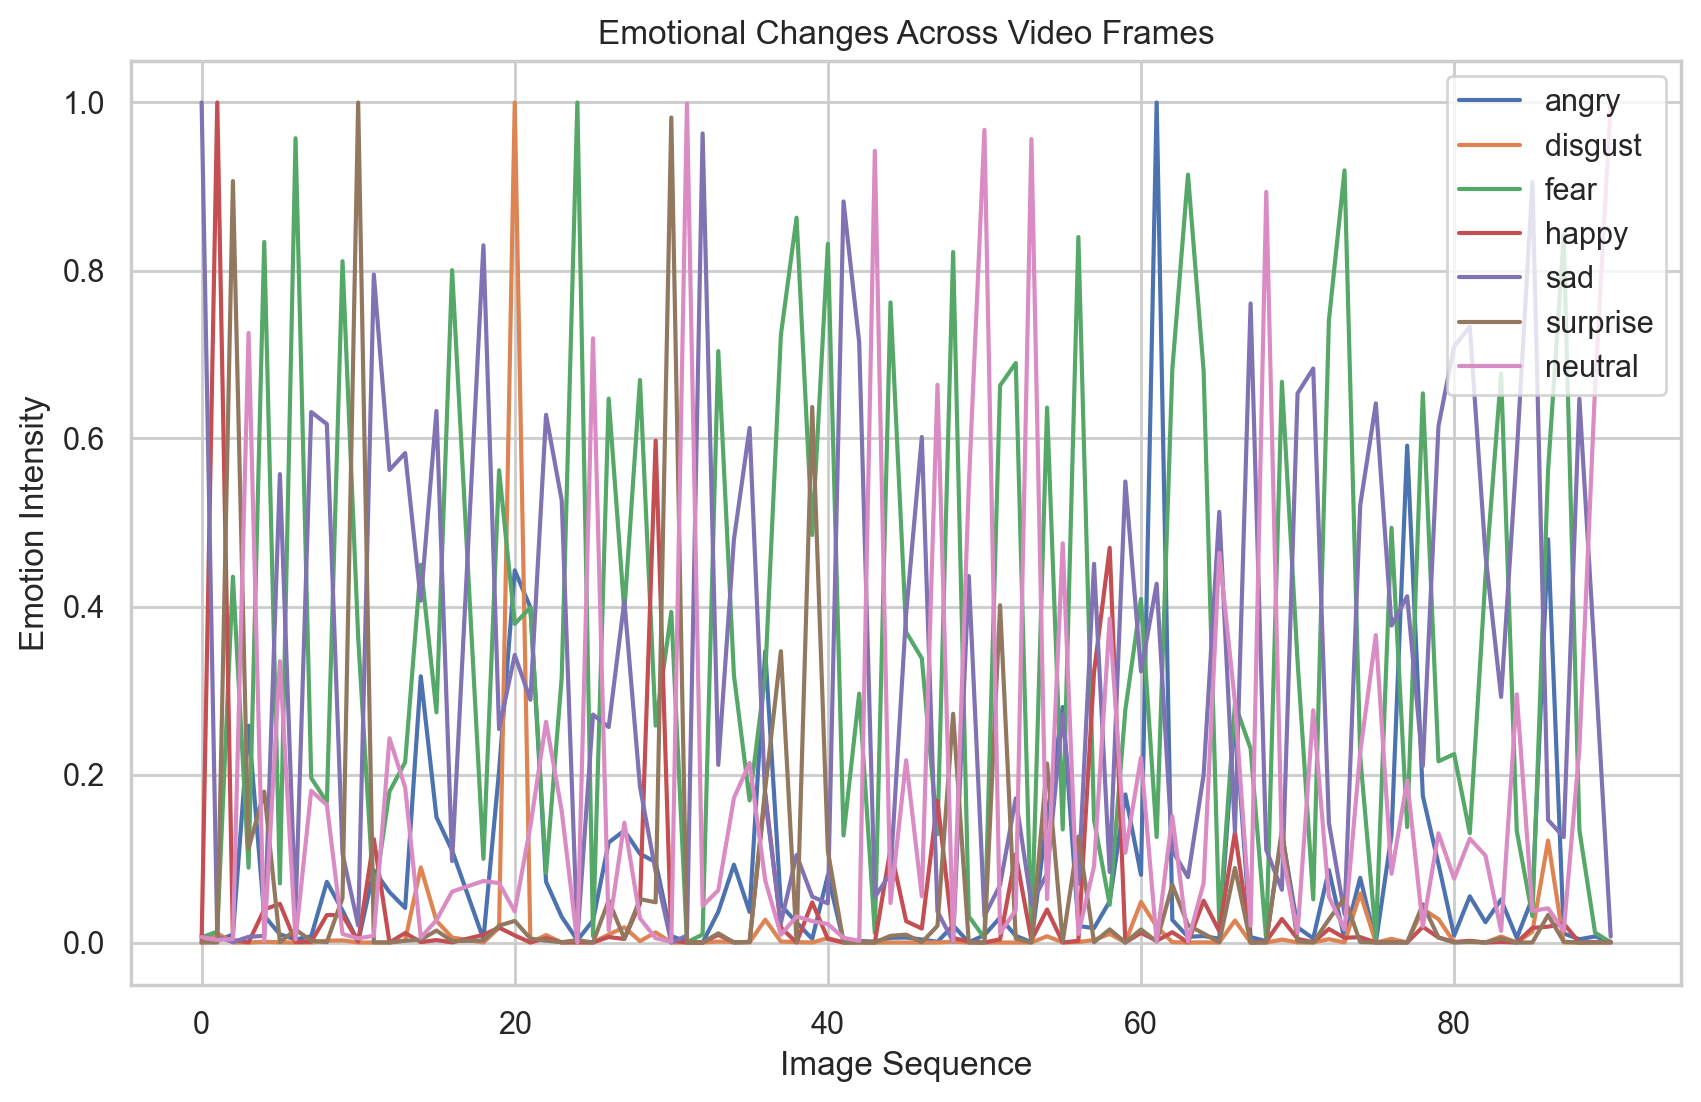

In [790]:
import matplotlib.pyplot as plt

# Plot emotion intensities across image sequences
plt.figure(figsize=(10, 6))

# Plot each emotion intensity
for emotion in ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']:
    plt.plot(normalized_emotion_data['image_seq'], normalized_emotion_data[emotion], label=emotion)

plt.xlabel('Image Sequence')
plt.ylabel('Emotion Intensity')
plt.title('Emotional Changes Across Video Frames')
plt.legend(loc='upper right')
plt.show()

**Analyzing Positive vs Negative Emotions**

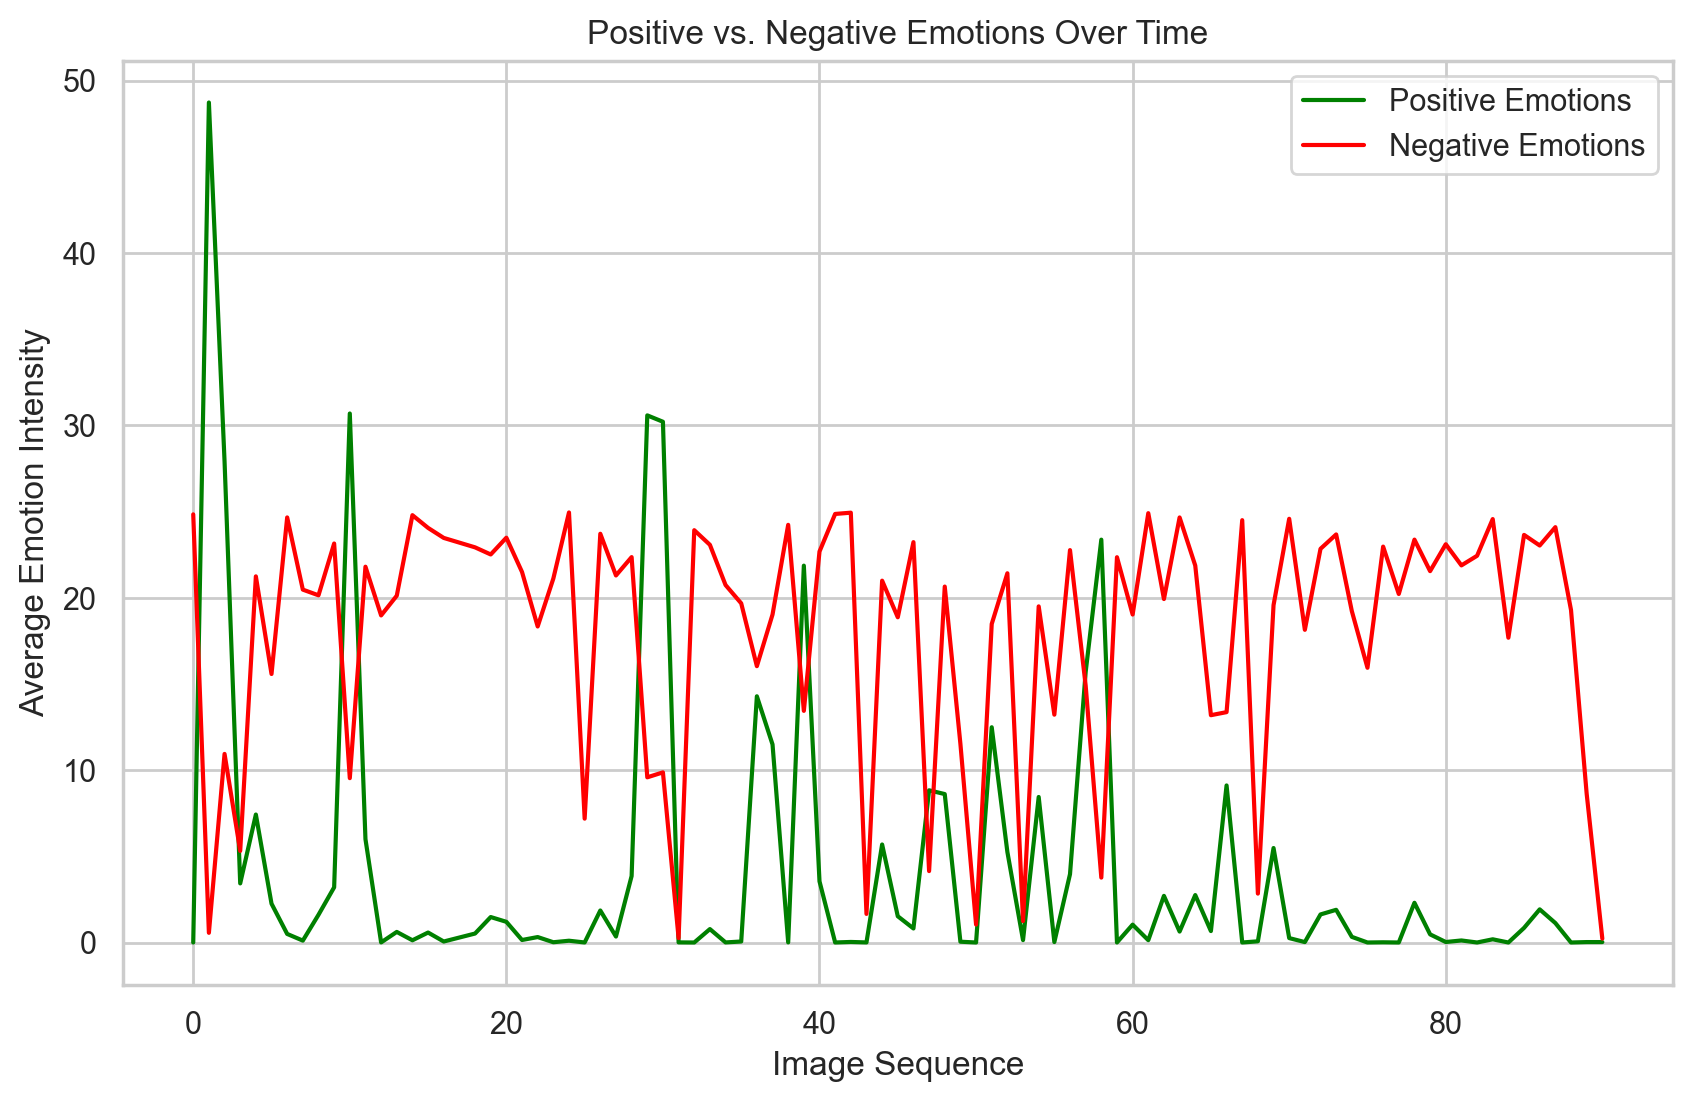

In [791]:
# Calculate average positive and negative emotions for each frame
emotion_data['positive_emotion'] = emotion_data[['happy', 'surprise']].mean(axis=1)
emotion_data['negative_emotion'] = emotion_data[['angry', 'sad', 'fear', 'disgust']].mean(axis=1)

# Plot positive vs negative emotions across image sequences
plt.figure(figsize=(10, 6))
plt.plot(emotion_data['image_seq'], emotion_data['positive_emotion'], label='Positive Emotions', color='green')
plt.plot(emotion_data['image_seq'], emotion_data['negative_emotion'], label='Negative Emotions', color='red')

plt.xlabel('Image Sequence')
plt.ylabel('Average Emotion Intensity')
plt.title('Positive vs. Negative Emotions Over Time')
plt.legend(loc='upper right')
plt.show()


**Analyzing Neutral Emotion**

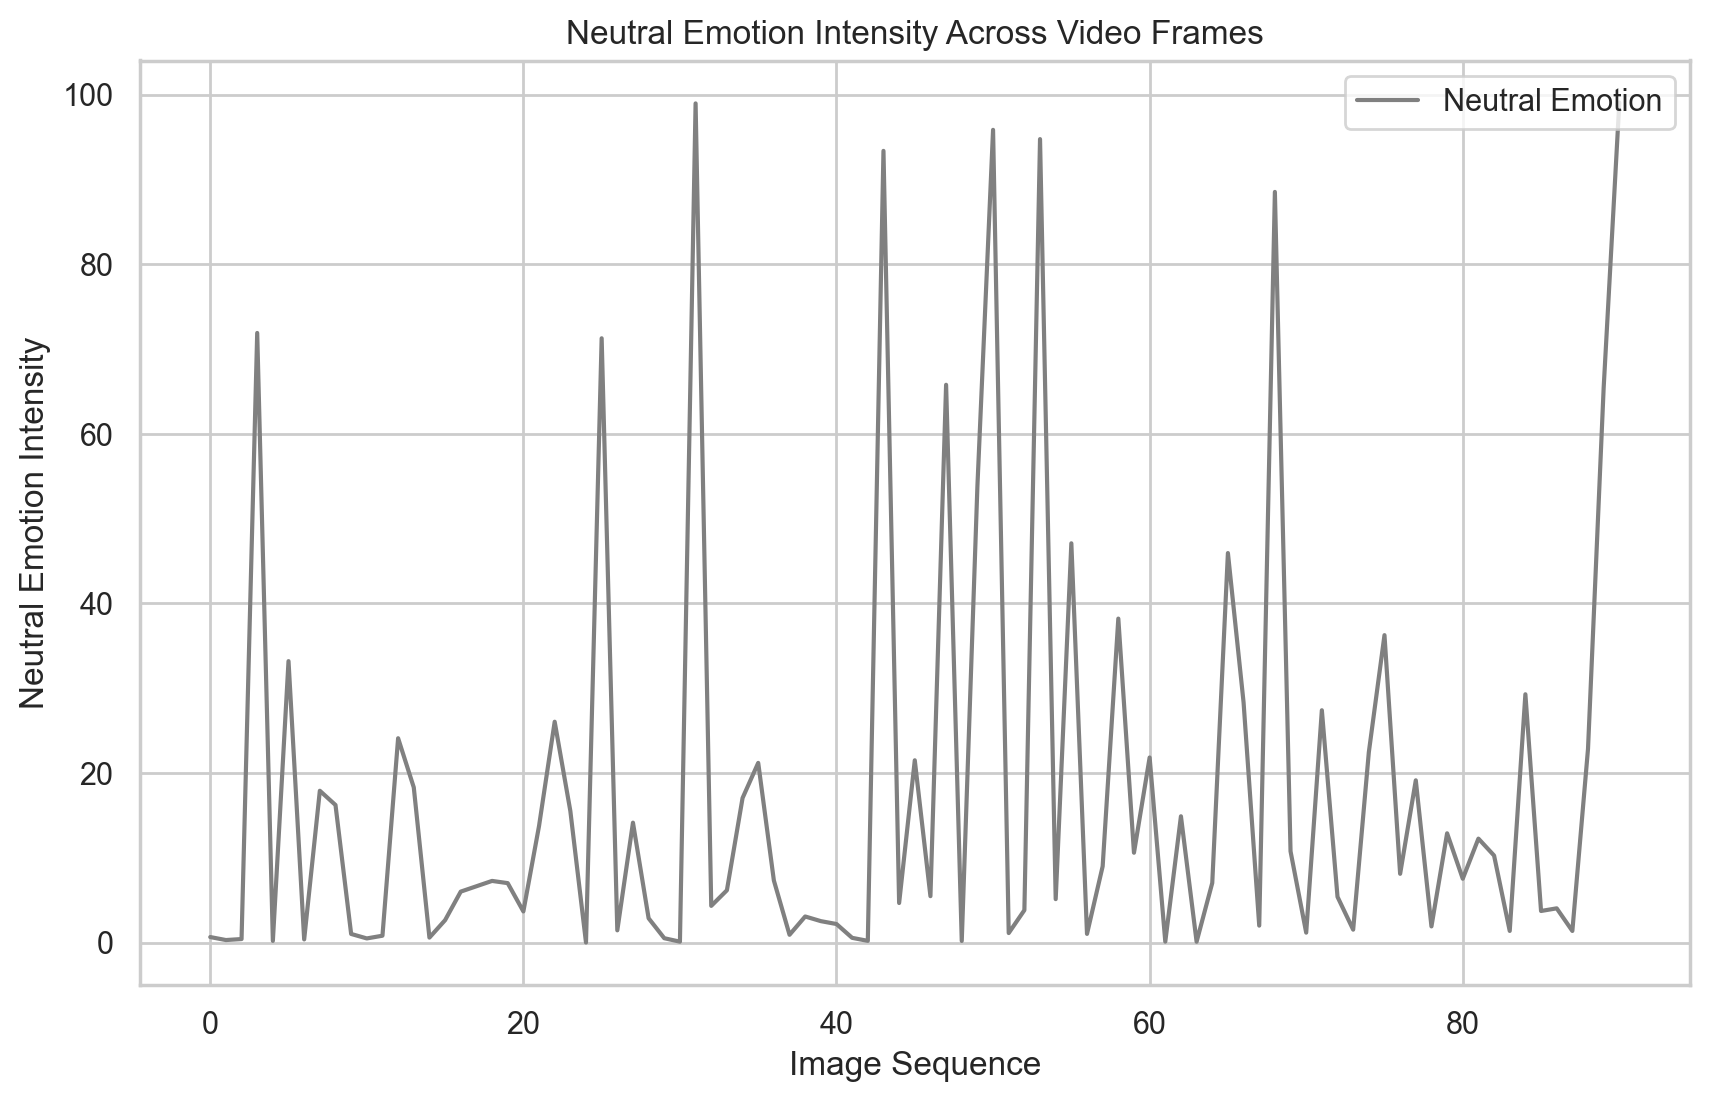

In [792]:
# Plot neutral emotion intensity
plt.figure(figsize=(10, 6))
plt.plot(emotion_data['image_seq'], emotion_data['neutral'], label='Neutral Emotion', color='gray')

plt.xlabel('Image Sequence')
plt.ylabel('Neutral Emotion Intensity')
plt.title('Neutral Emotion Intensity Across Video Frames')
plt.legend(loc='upper right')
plt.show()


**Identifying Dominant Emotions**

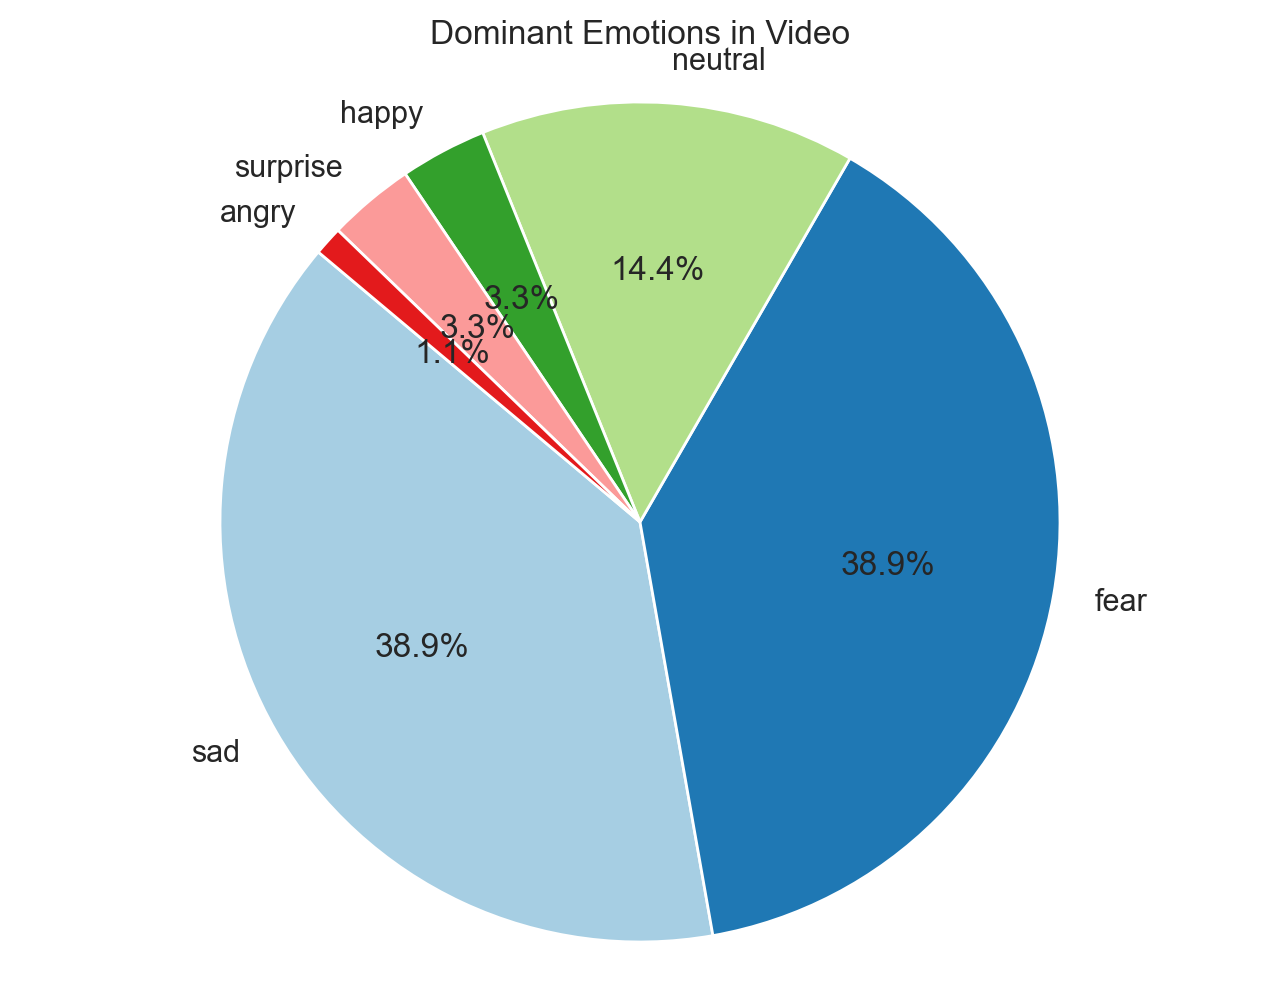

In [793]:
# Count occurrences of each dominant emotion
dominant_emotion_count = emotion_data['dominant_emotion'].value_counts()

# Plot the dominant emotions as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(dominant_emotion_count, labels=dominant_emotion_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Dominant Emotions in Video')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()



In [794]:
# Compute standard deviation of each emotion to detect emotional swings
emotion_variability = emotion_data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']].std()

# Display emotion variability
print(emotion_variability)

angry        6.837119
disgust      0.282245
fear        29.611261
happy       13.262473
sad         27.452548
surprise    11.801720
neutral     26.503800
dtype: float64


In [795]:
import pandas as pd
from tabulate import tabulate

# Compute standard deviation of each emotion
emotion_variability = emotion_data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']].std()

# Create a DataFrame for better styling
emotion_variability_df = pd.DataFrame(emotion_variability, columns=['Emotion Variability Score'])

# Print the styled table
print(tabulate(emotion_variability_df, headers='keys', tablefmt='fancy_grid'))


╒══════════╤═════════════════════════════╕
│          │   Emotion Variability Score │
╞══════════╪═════════════════════════════╡
│ angry    │                    6.83712  │
├──────────┼─────────────────────────────┤
│ disgust  │                    0.282245 │
├──────────┼─────────────────────────────┤
│ fear     │                   29.6113   │
├──────────┼─────────────────────────────┤
│ happy    │                   13.2625   │
├──────────┼─────────────────────────────┤
│ sad      │                   27.4525   │
├──────────┼─────────────────────────────┤
│ surprise │                   11.8017   │
├──────────┼─────────────────────────────┤
│ neutral  │                   26.5038   │
╘══════════╧═════════════════════════════╛


**Gaze Data Analysis**

**Calculating eye contact consistency**

In [796]:
# Calculate percentage of eye contact
eye_contact_percentage = normalized_gaze_data['gaze'].mean() * 100
print(f"Eye Contact Consistency: {eye_contact_percentage:.2f}%")

Eye Contact Consistency: 73.33%


**Visualizing gaze data**

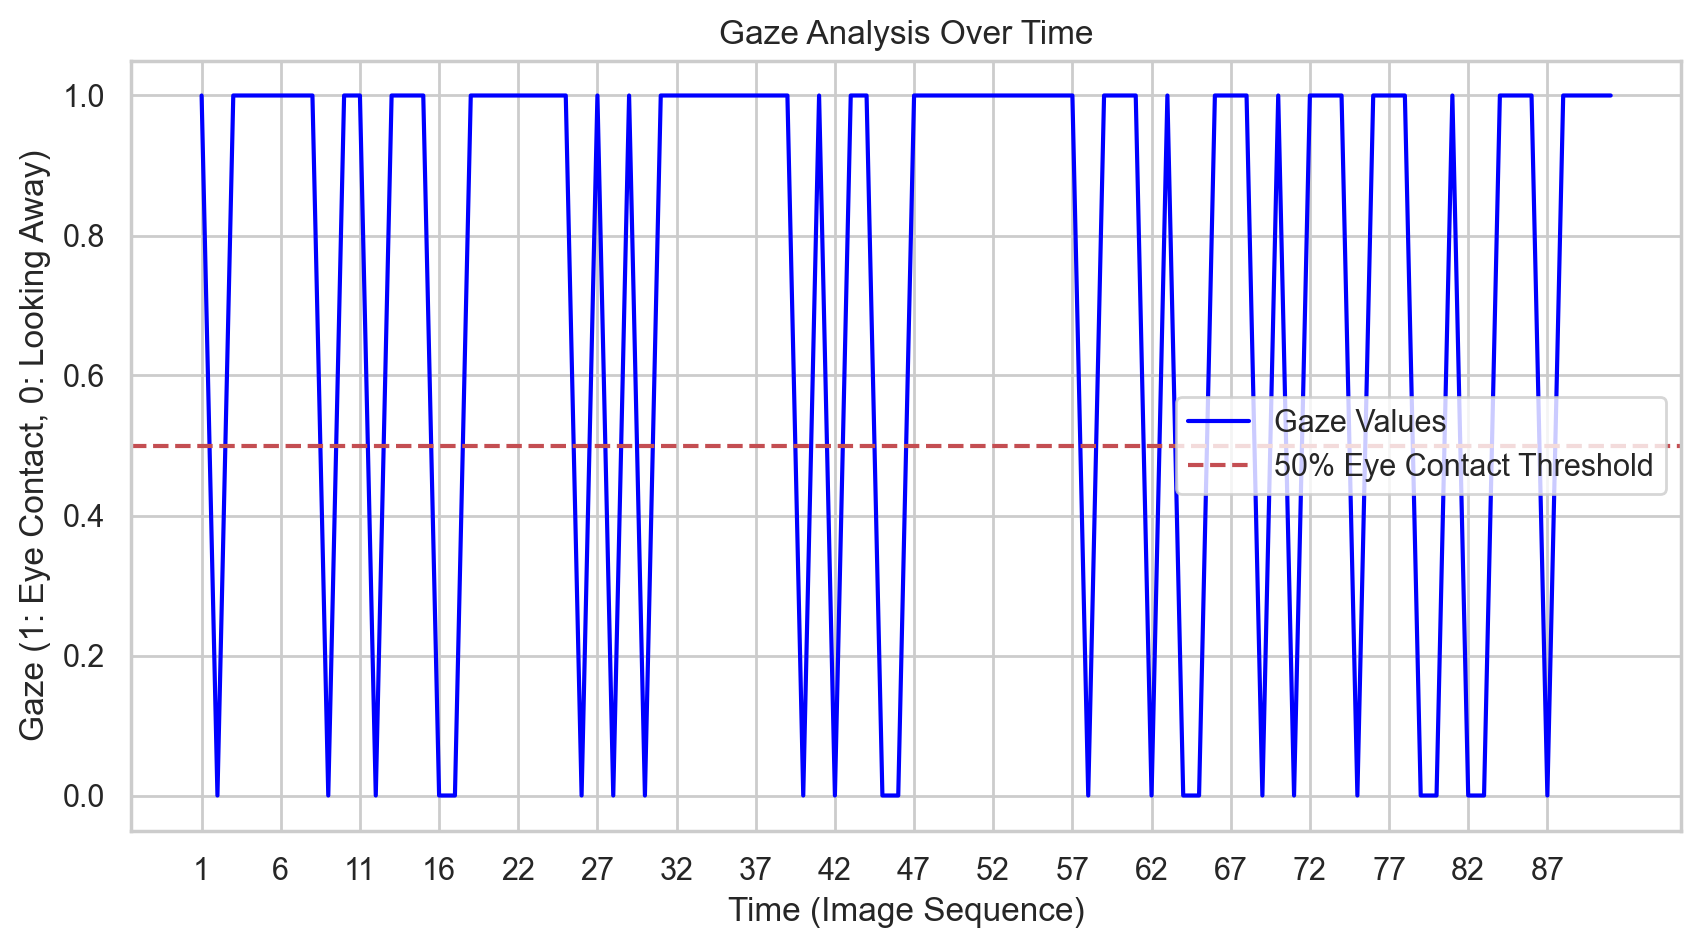

In [797]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(normalized_gaze_data['gaze'], label='Gaze Values', color='blue')
plt.title('Gaze Analysis Over Time')
plt.xlabel('Time (Image Sequence)')
plt.ylabel('Gaze (1: Eye Contact, 0: Looking Away)')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Eye Contact Threshold')
plt.legend()
plt.xticks(range(0, len(normalized_gaze_data), 5), normalized_gaze_data['image_seq'][::5], rotation=0)
plt.show()


**Calculating Blink Rates**

In [798]:
# Calculate total blinks
total_blinks = normalized_gaze_data['blink'].sum()
print(f"Total Blinks: {total_blinks}")

Total Blinks: 15


**Visualizing Blinks**

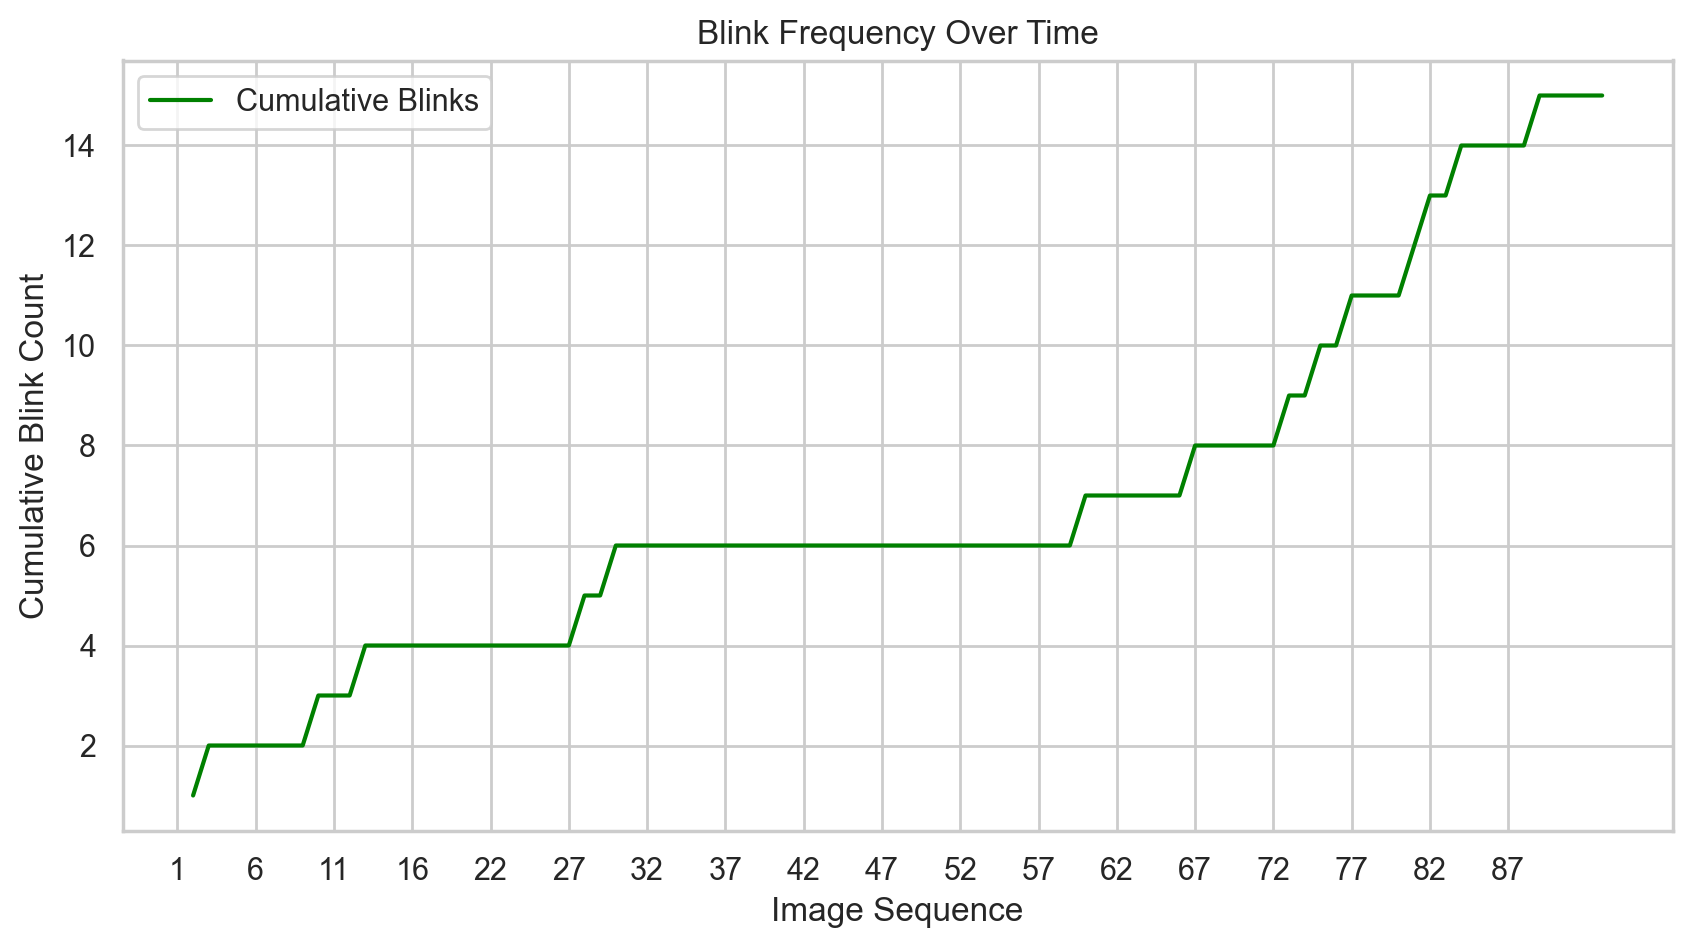

In [799]:
plt.figure(figsize=(10, 5))
plt.plot(normalized_gaze_data['image_seq'], normalized_gaze_data['blink'].cumsum(), label='Cumulative Blinks', color='green')
plt.title('Blink Frequency Over Time')
plt.xlabel('Image Sequence')
plt.ylabel('Cumulative Blink Count')
plt.legend()
plt.xticks(range(0, len(normalized_gaze_data), 5), normalized_gaze_data['image_seq'][::5], rotation=0)
plt.show()


**Visualizing eye offset**

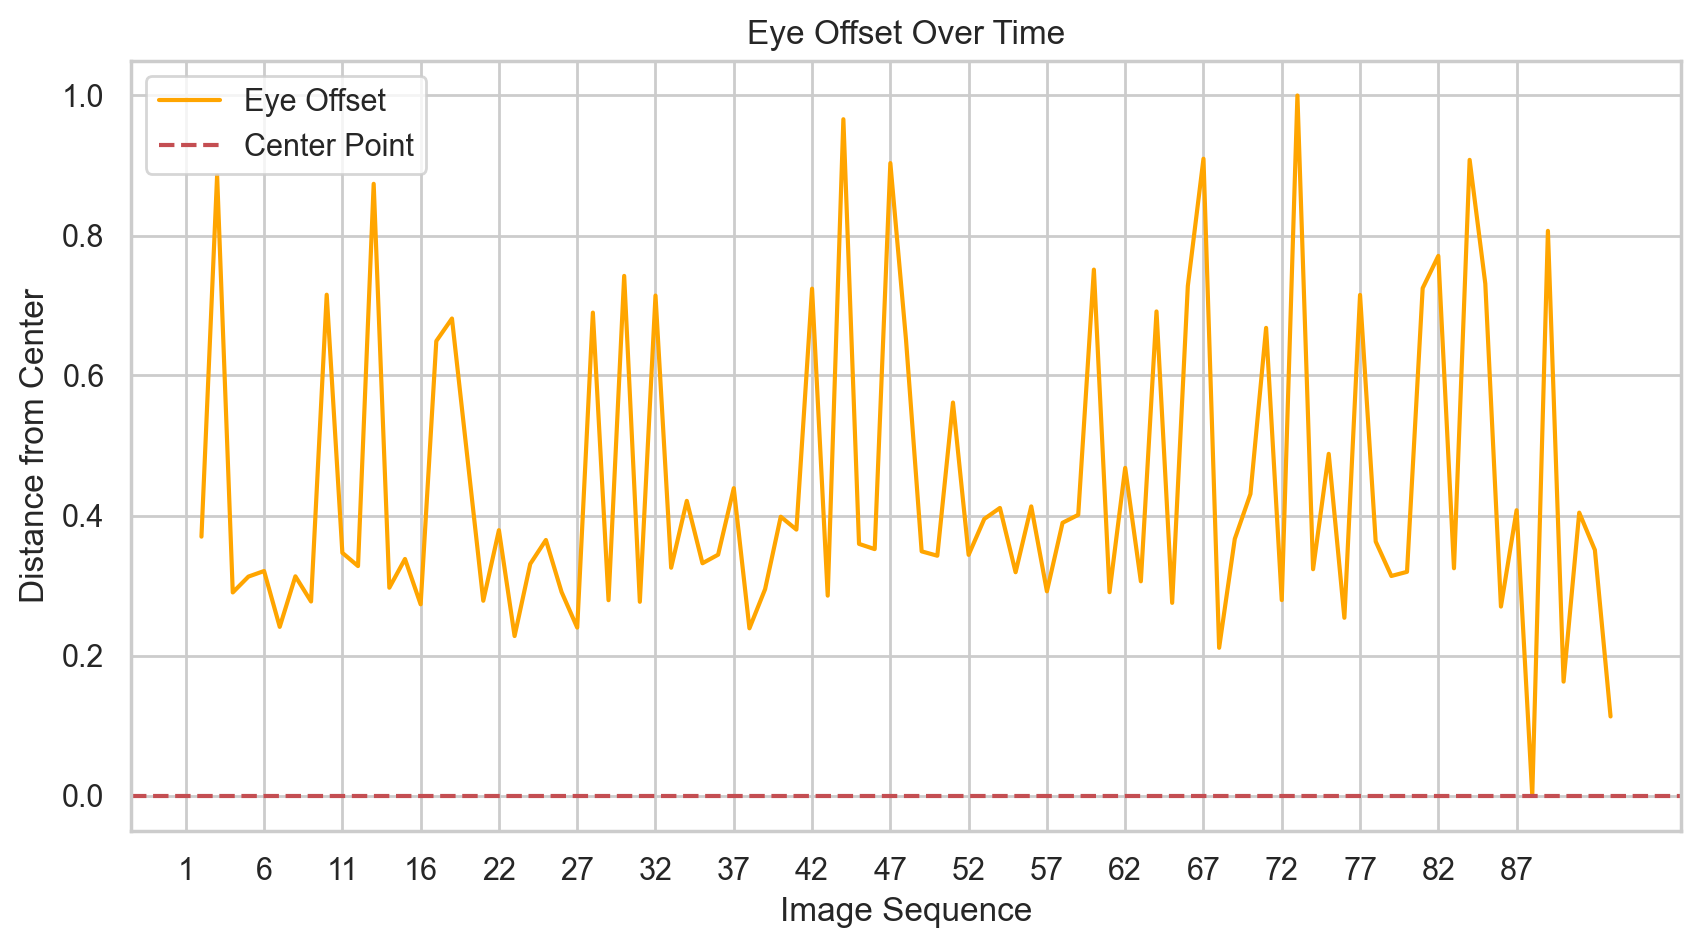

In [800]:
plt.figure(figsize=(10, 5))
plt.plot(normalized_gaze_data['image_seq'], normalized_gaze_data['eye_offset'], label='Eye Offset', color='orange')
plt.title('Eye Offset Over Time')
plt.xlabel('Image Sequence')
plt.ylabel('Distance from Center')
plt.axhline(y=0, color='r', linestyle='--', label='Center Point')
plt.legend()
plt.xticks(range(0, len(normalized_gaze_data), 5), normalized_gaze_data['image_seq'][::5], rotation=0)
plt.show()


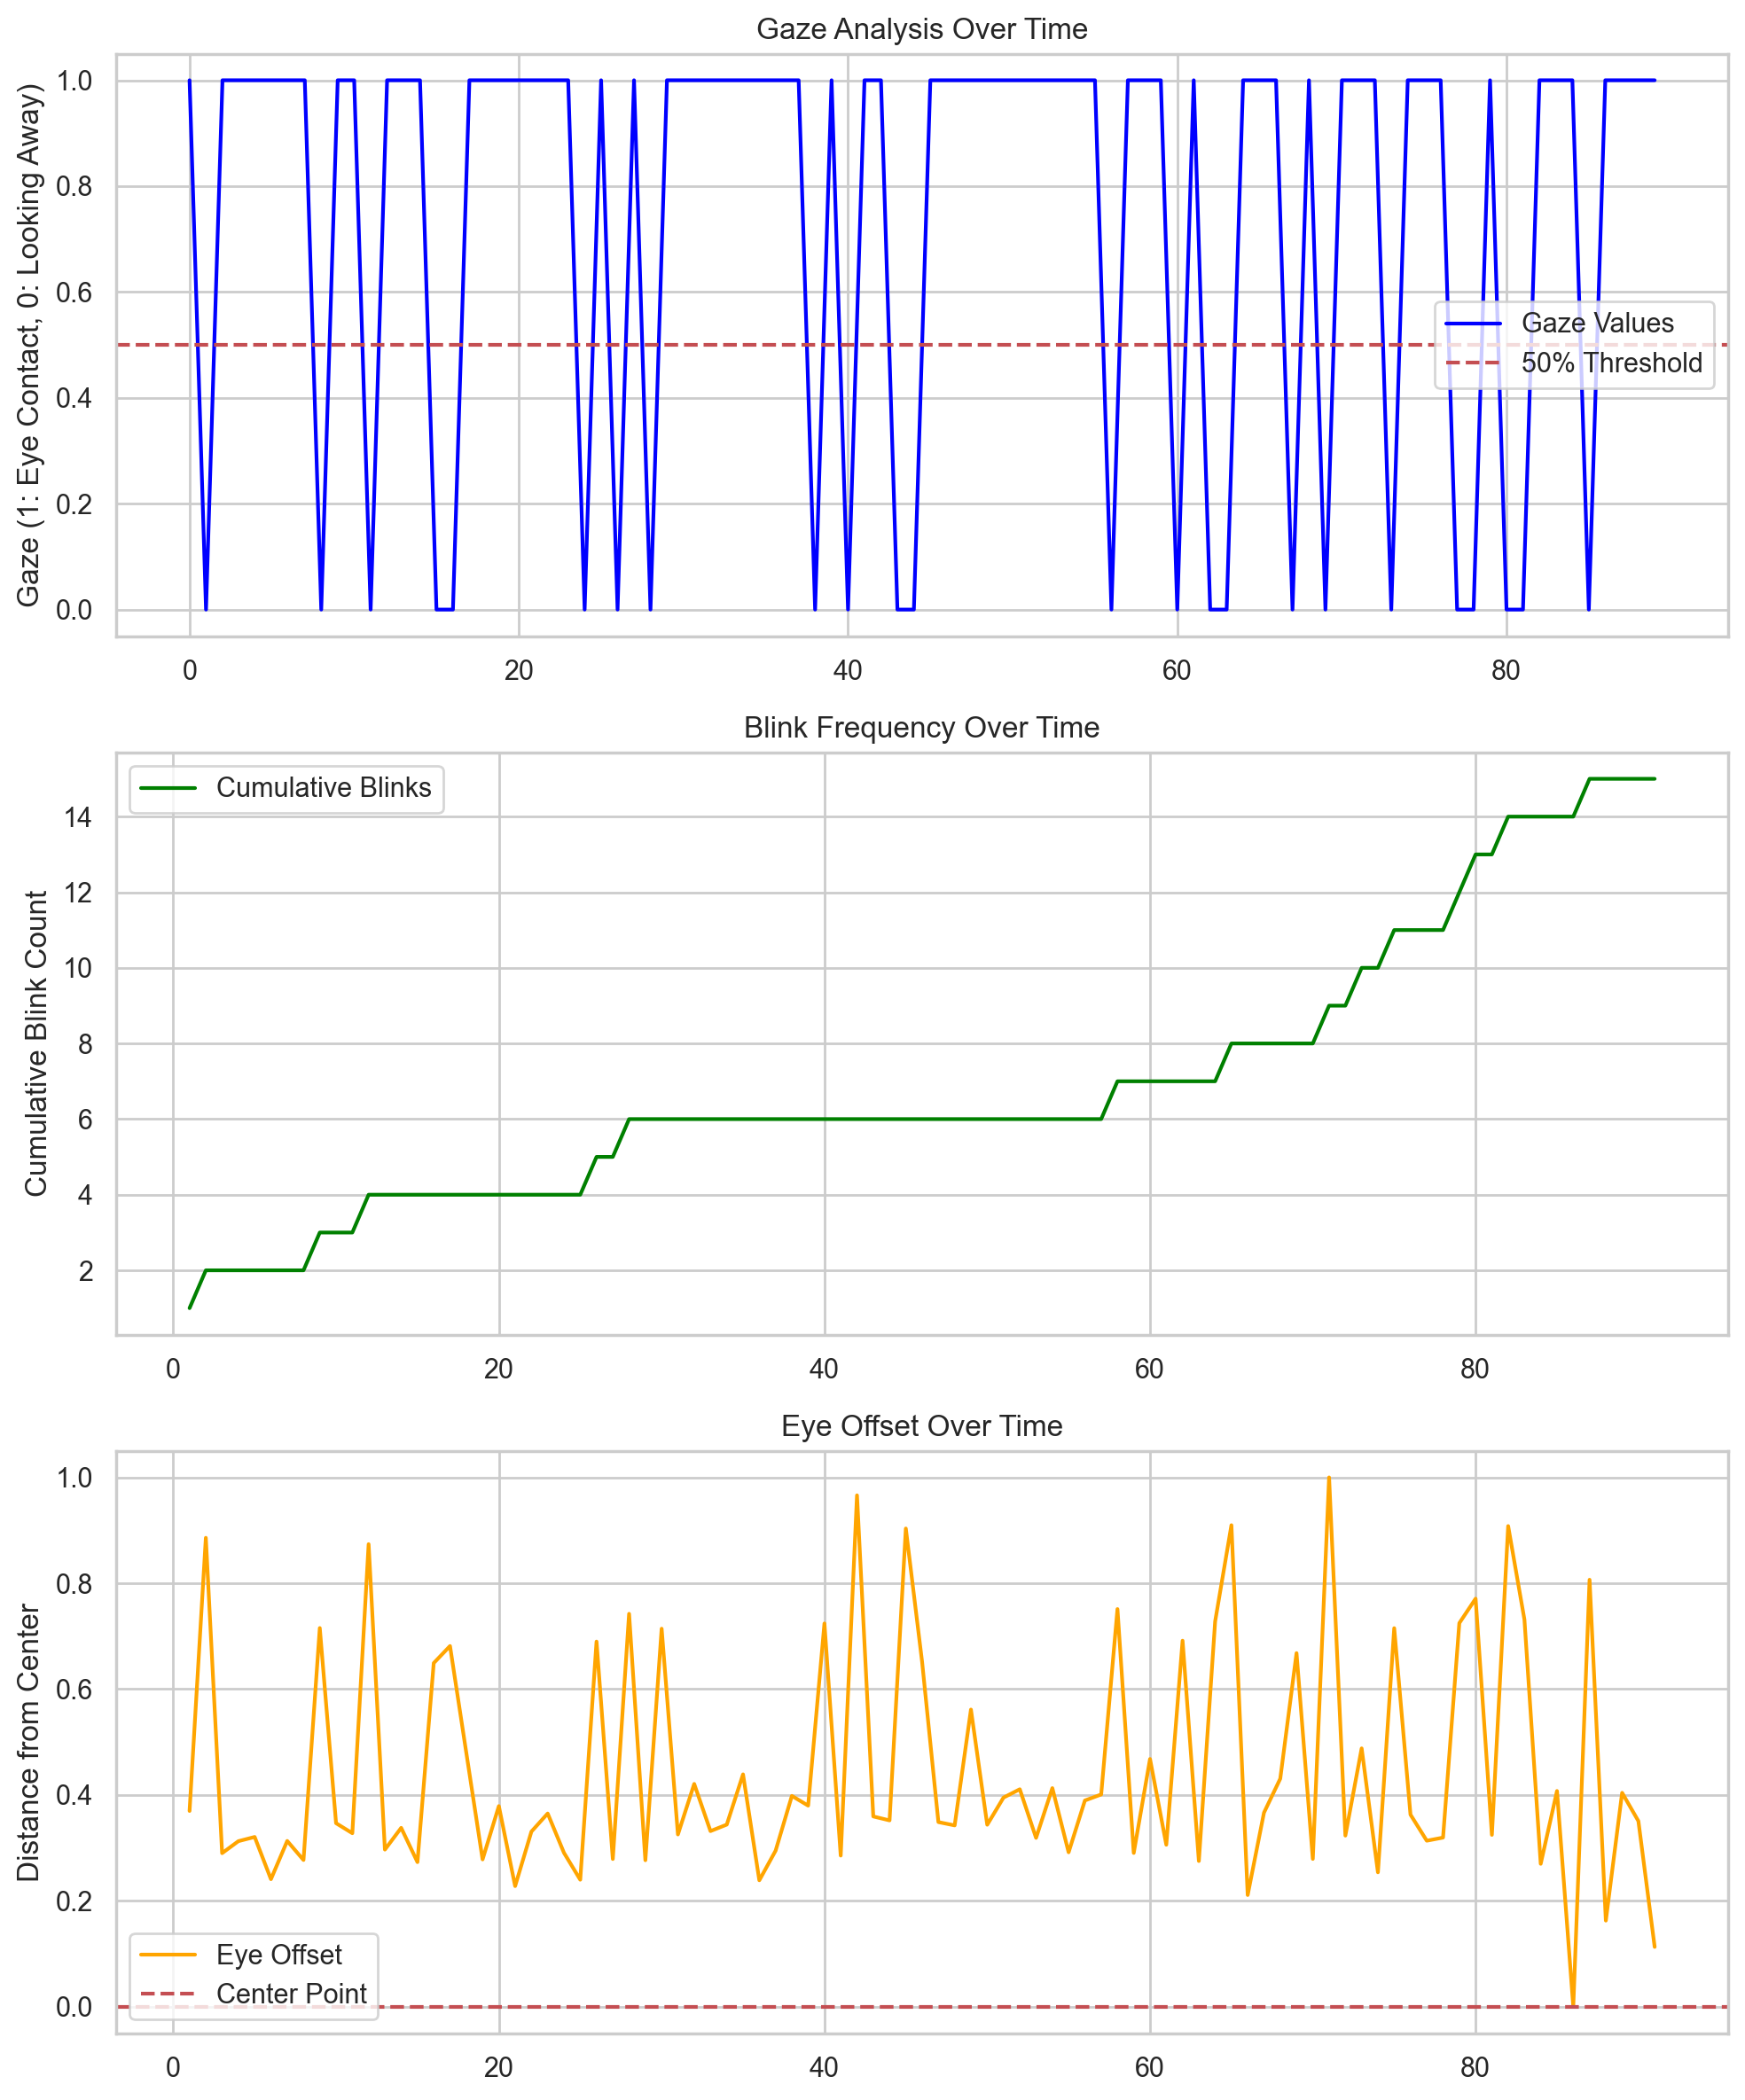

In [801]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Gaze values
axs[0].plot(normalized_gaze_data['gaze'], label='Gaze Values', color='blue')
axs[0].axhline(y=0.5, color='r', linestyle='--', label='50% Threshold')
axs[0].set_title('Gaze Analysis Over Time')
axs[0].set_ylabel('Gaze (1: Eye Contact, 0: Looking Away)')
axs[0].legend()

# Cumulative Blink Frequency
axs[1].plot(normalized_gaze_data['image_seq'], normalized_gaze_data['blink'].cumsum(), label='Cumulative Blinks', color='green')
axs[1].set_title('Blink Frequency Over Time')
axs[1].set_ylabel('Cumulative Blink Count')
axs[1].legend()

# Eye offset
axs[2].plot(normalized_gaze_data['image_seq'], normalized_gaze_data['eye_offset'], label='Eye Offset', color='orange')
axs[2].axhline(y=0, color='r', linestyle='--', label='Center Point')
axs[2].set_title('Eye Offset Over Time')
axs[2].set_ylabel('Distance from Center')
axs[2].legend()

plt.tight_layout()
plt.show()


**Visualizing distribution of Positive, Negative and Neutral Emotion**

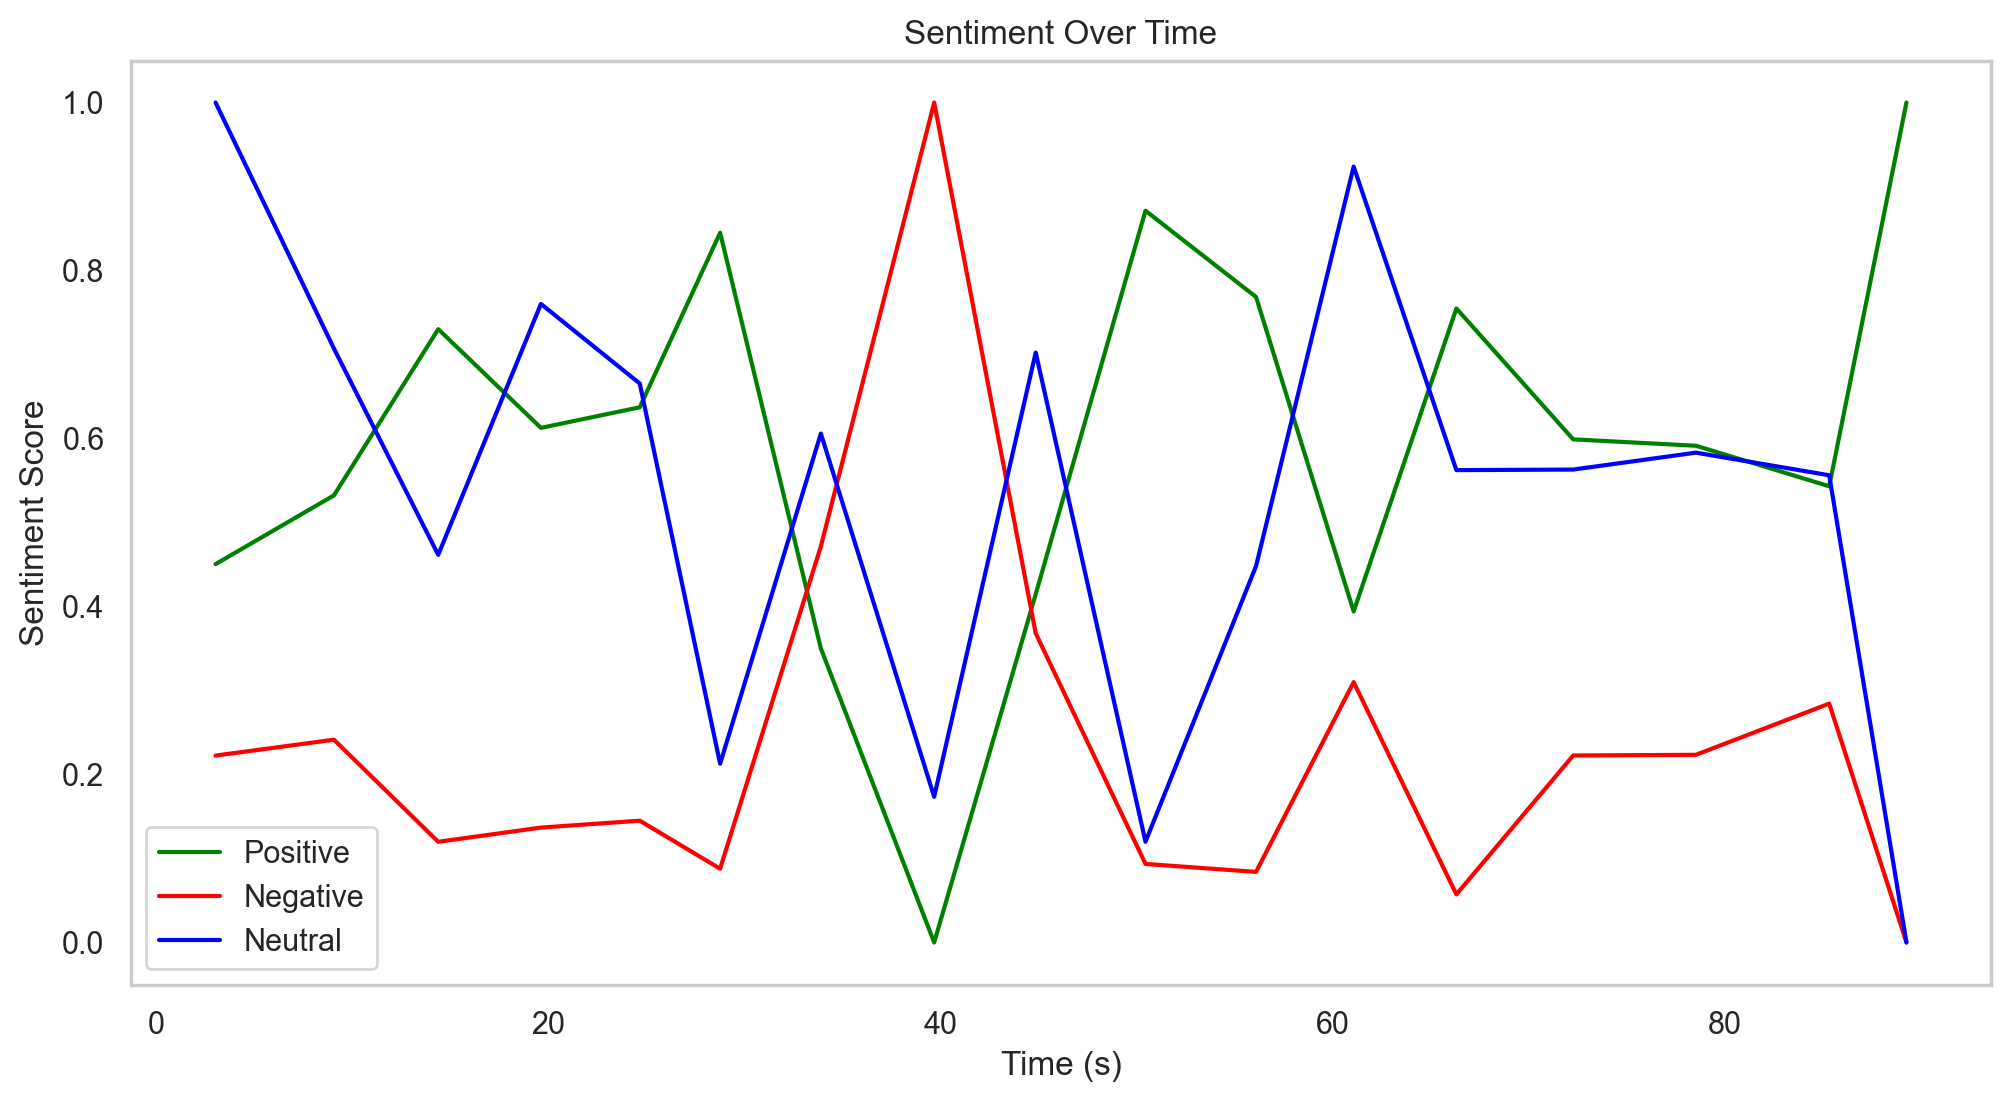

In [802]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data

# Calculate midpoint for each segment
normalized_transcript_scores['midpoint'] = (normalized_transcript_scores['start'] + normalized_transcript_scores['end']) / 2

# Plot sentiments over time
plt.figure(figsize=(12, 6))
plt.plot(normalized_transcript_scores['midpoint'], normalized_transcript_scores['positive'], label='Positive', color='green')
plt.plot(normalized_transcript_scores['midpoint'], normalized_transcript_scores['negative'], label='Negative', color='red')
plt.plot(normalized_transcript_scores['midpoint'], normalized_transcript_scores['neutral'], label='Neutral', color='blue')

plt.title('Sentiment Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()

**Confident, Enhthusiasm, Hesitation**

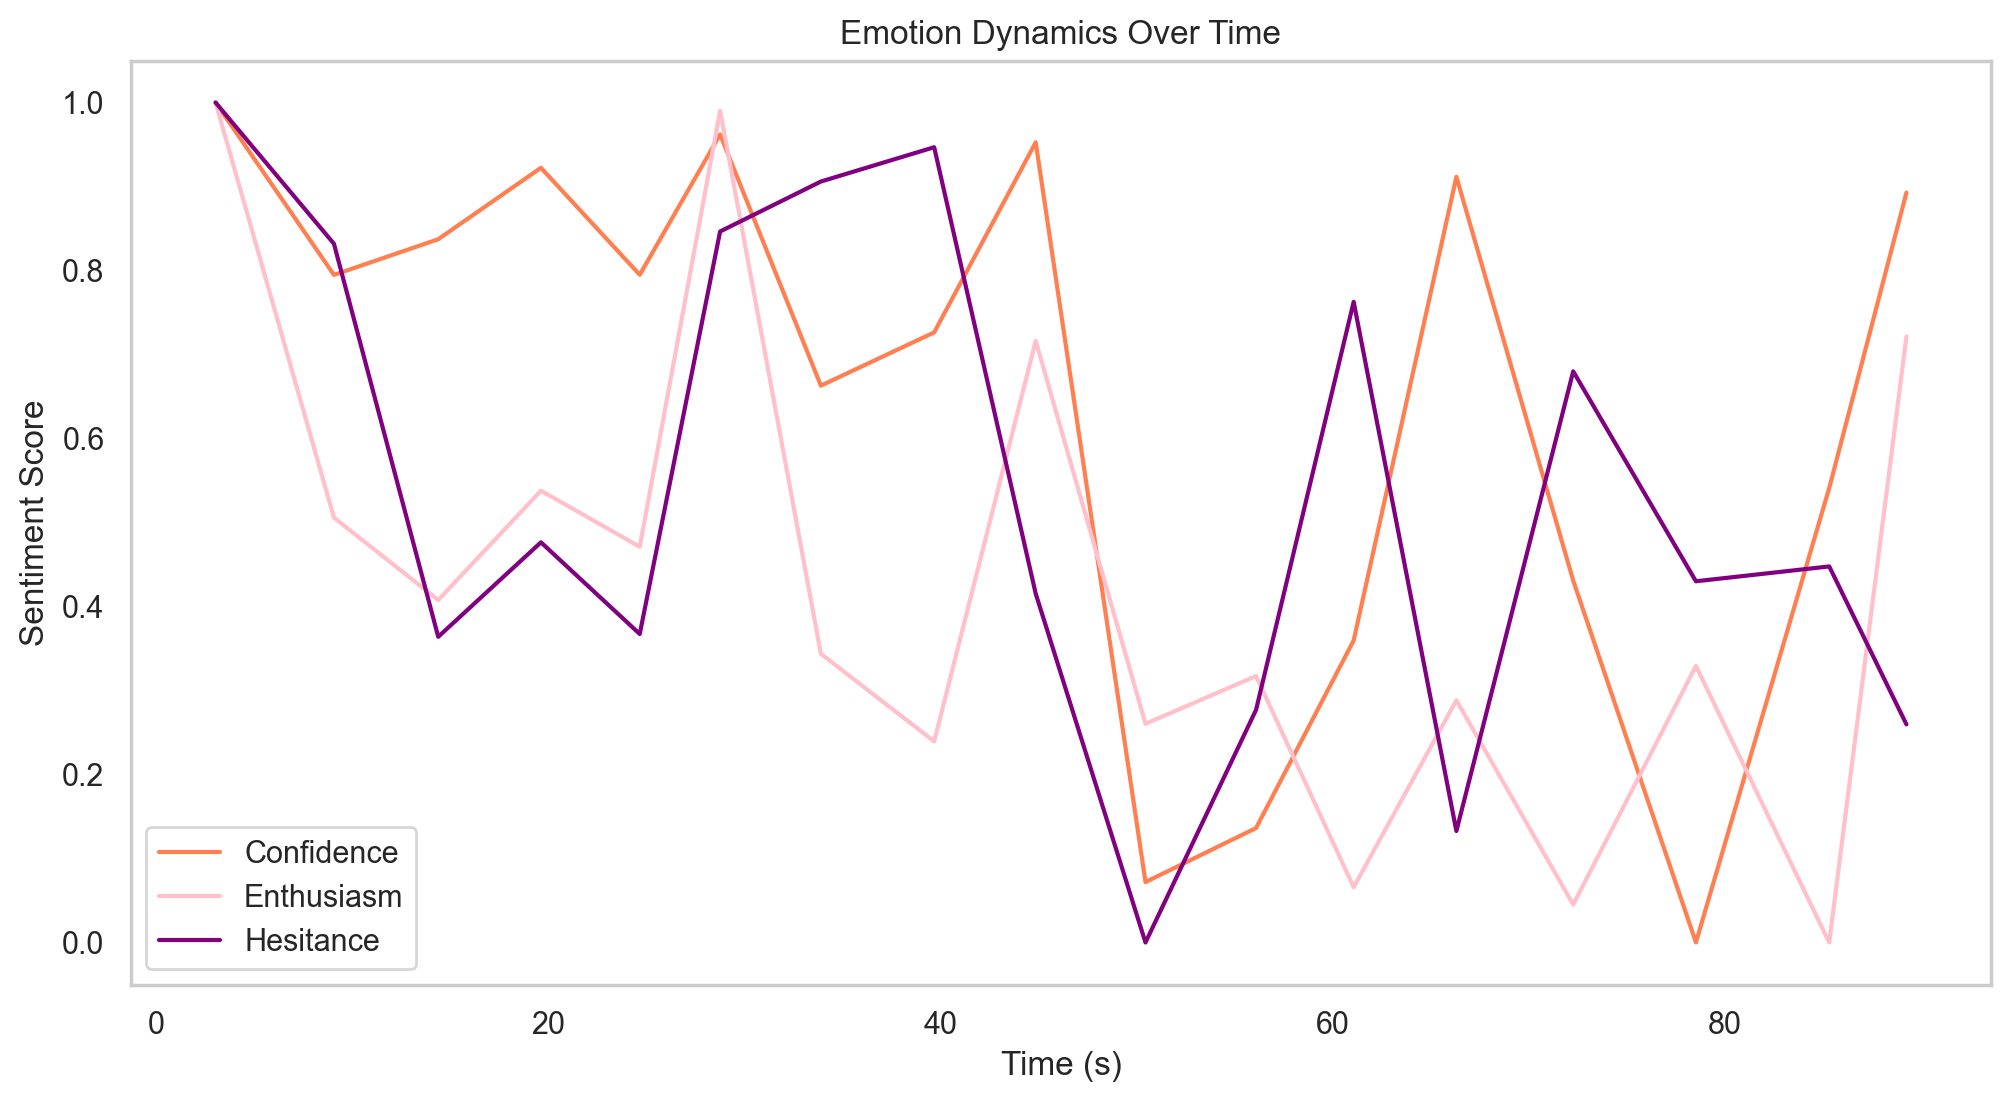

In [803]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data

# Calculate midpoint for each segment
normalized_transcript_scores['midpoint'] = (normalized_transcript_scores['start'] + normalized_transcript_scores['end']) / 2

# Plot sentiments over time
plt.figure(figsize=(12, 6))
plt.plot(normalized_transcript_scores['midpoint'], normalized_transcript_scores['confident'], label='Confidence', color='coral')
plt.plot(normalized_transcript_scores['midpoint'], normalized_transcript_scores['enthusiastic'], label='Enthusiasm', color='pink')
plt.plot(normalized_transcript_scores['midpoint'], normalized_transcript_scores['hesitant'], label='Hesitance', color='purple')

plt.title('Emotion Dynamics Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()

**Text Analysis**

**Word Frequency Analysis**

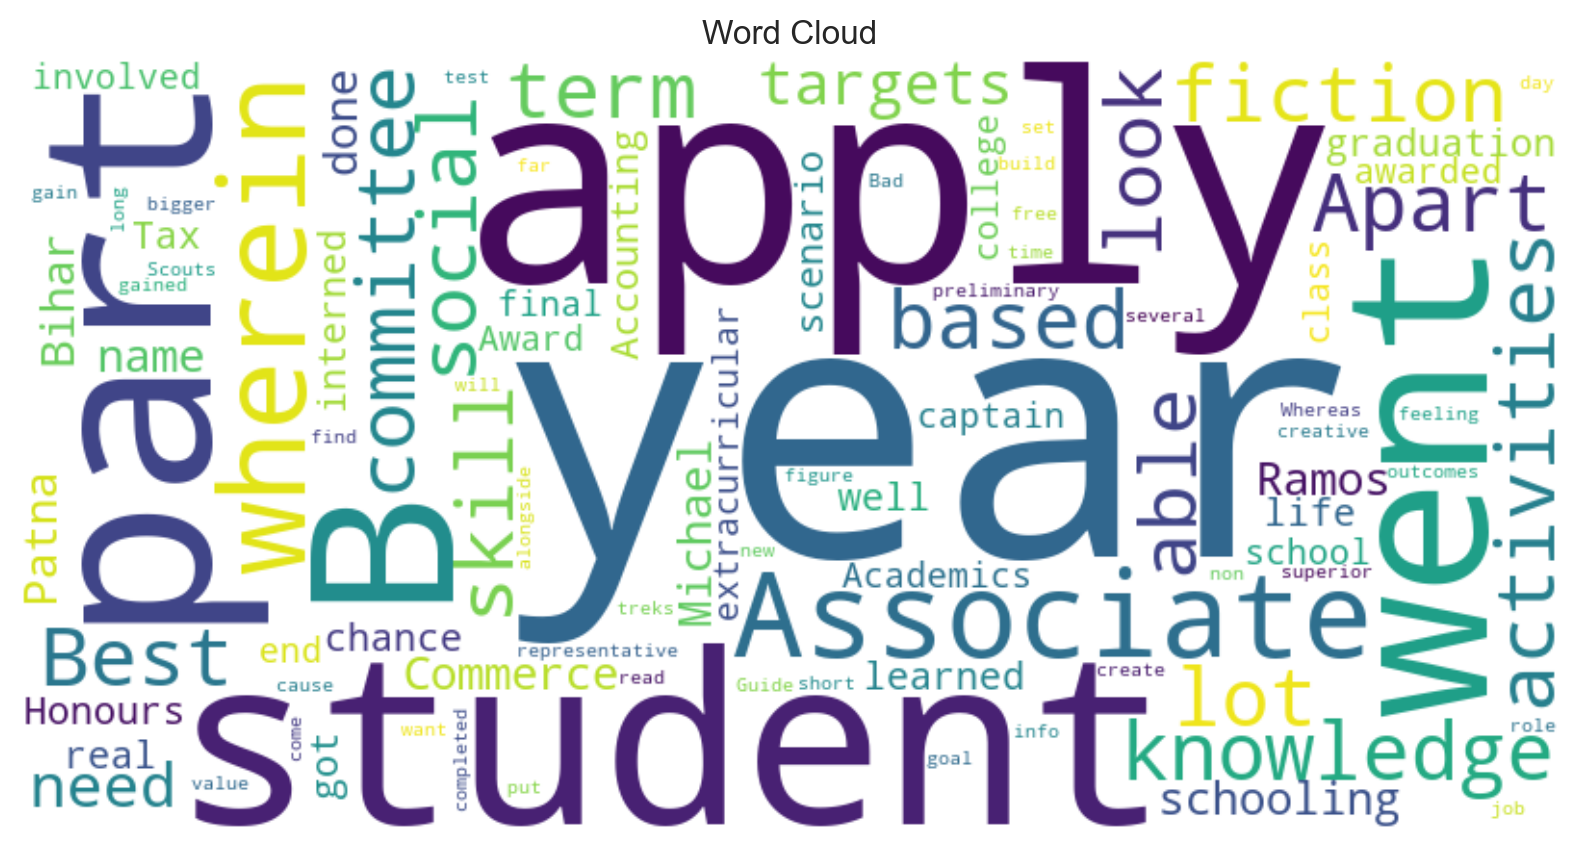

In [804]:
from wordcloud import WordCloud

# Combine all text from the transcripts
text_combined = ' '.join(transcript_scores['text'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


**Correlation Analysis**

Full Correlation Matrix:
                concise  speech_speed  confident  enthusiastic  hesitant
concise       1.000000     -0.038173   0.724910      0.512399  0.507925
speech_speed -0.038173      1.000000   0.203297      0.181613  0.063956
confident     0.724910      0.203297   1.000000      0.622402  0.299064
enthusiastic  0.512399      0.181613   0.622402      1.000000  0.218792
hesitant      0.507925      0.063956   0.299064      0.218792  1.000000


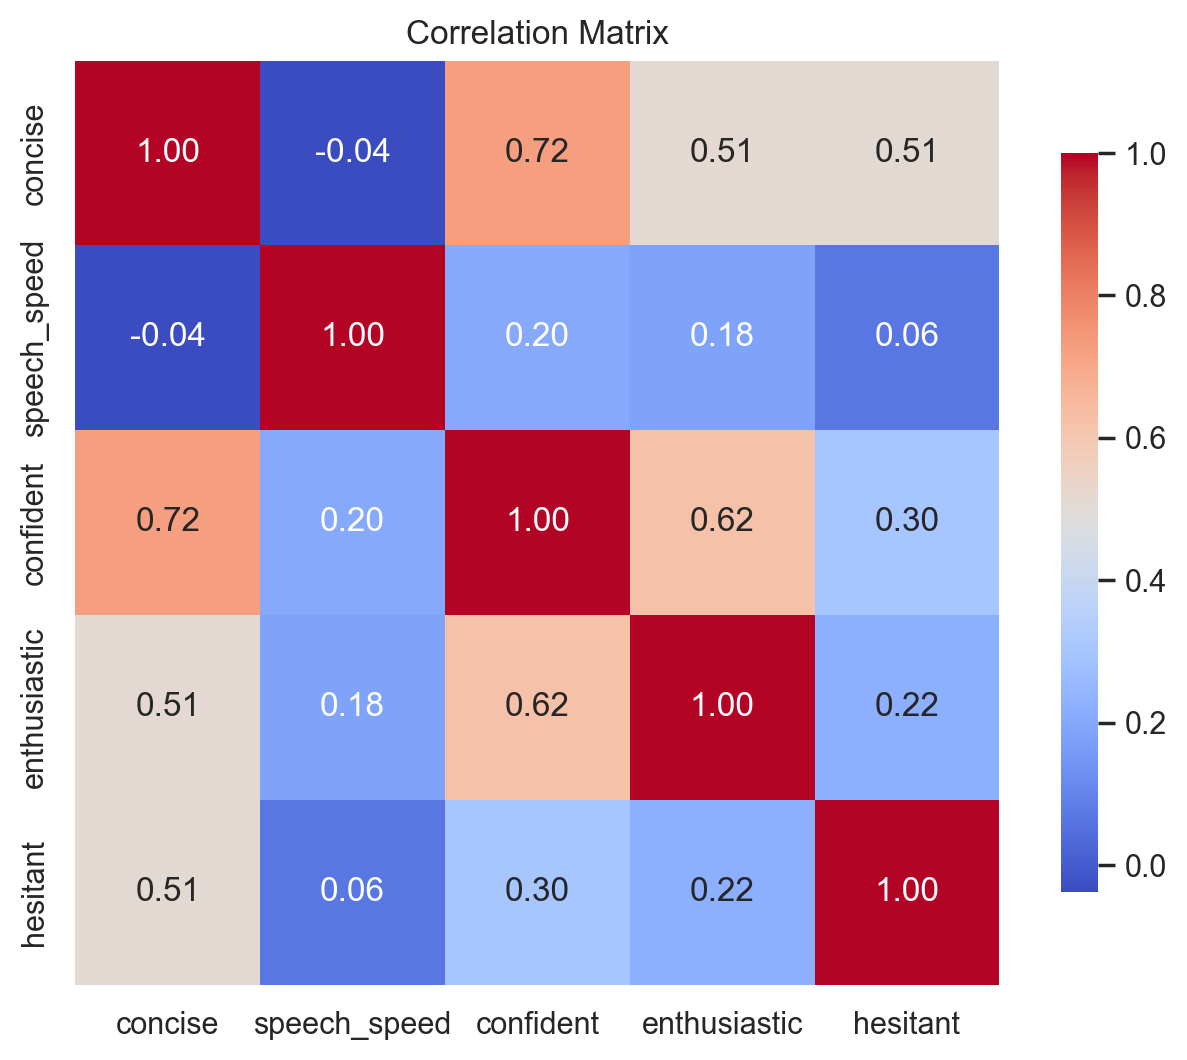

In [805]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Select only the relevant columns
relevant_columns = ["concise", "speech_speed", "confident", "enthusiastic", "hesitant"]
filtered_df = normalized_transcript_scores[relevant_columns]

# Ensure all columns are numeric
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr = filtered_df.corr()

# Print the full correlation matrix
print("Full Correlation Matrix:\n", corr)

# Plotting the heatmap for the correlation matrix without threshold
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()
